#### Bondora Data Preprocessing 

In this project we will be doing credit risk modelling of peer to peer lending Bondora systems.Data for the study has been retrieved from a publicly available data set of a leading European P2P lending platform  ([**Bondora**](https://www.bondora.com/en/public-reports#dataset-file-format)).The retrieved data is a pool of both defaulted and non-defaulted loans from the time period between **1st March 2009** and **27th January 2020**. The data
comprises of demographic and financial information of borrowers, and loan transactions.In P2P lending, loans are typically uncollateralized and lenders seek higher returns as a compensation for the financial risk they take. In addition, they need to make decisions under information asymmetry that works in favor of the borrowers. In order to make rational decisions, lenders want to minimize the risk of default of each lending decision, and realize the return that compensates for the risk.

In this notebook we will preprocess the raw dataset and will create new preprocessed csv that can be used for building credit risk models.

In [1]:
import numpy as np 
import pandas as pd
pd.set_option('display.max_columns', 500) # To display all the columns of dataframe 

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Bondora_raw.csv',low_memory=False)

In [3]:
df.shape

(134529, 112)

In [4]:
df['Status'].value_counts()

Current    57135
Late       45772
Repaid     31622
Name: Status, dtype: int64

In [5]:
df.head()

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,ContractEndDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,NrOfDependants,EmploymentStatus,EmploymentDurationCurrentEmployer,EmploymentPosition,WorkExperience,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedPrincipalTillDate,PlannedInterestTillDate,LastPaymentOn,CurrentDebtDaysPrimary,DebtOccuredOn,CurrentDebtDaysSecondary,DebtOccuredOnForSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,DefaultDate,PrincipalOverdueBySchedule,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,StageActiveSince,ModelVersion,Rating,EL_V0,Rating_V0,EL_V1,Rating_V1,Rating_V2,Status,Restructured,ActiveLateCategory,WorseLateCategory,CreditScoreEsMicroL,CreditScoreEsEquifaxRisk,CreditScoreFiAsiakasTietoRiskGrade,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.0410,KARU,True,2009-06-11 16:40:39,2009-06-16,2010-07-06,2009-07-27,2010-06-25,2010-06-25,17,5,2.0,1,61,1947-11-26,1.0,EE,319.5582,115.0408,30.0,12,NaN,HARJU,TALLINN,7,3.0,1.0,0,3.0,UpTo3Years,klienditeenindaja,MoreThan25Years,7.0,NaN,6000.0,0.0,0.0,0.0,0.0,0.0,4500.0,10500.0,0,0.0,0,0.0,0.0,25,True,1800.0000,319.0800,2010-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,91-120,NaN,NaN,NaN,NaN,115.0408,20.4222,0.0,0.0,0.00,0.00,1,83.0852,0.0000,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1,2020-01-27,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,2009-06-10 15:48:57,0,0,140.6057,koort681,False,2009-06-10 15:48:57,2009-06-15,2009-07-07,2009-07-15,2009-07-15,2009-07-15,20,4,2.0,1,48,1960-11-05,1.0,EE,191.7349,140.6057,25.0,1,NaN,IDA-VIRU,KOHTLA-JARVE,7,5.0,4.0,0,3.0,MoreThan5Years,Õppealajuhataja lasteaias,MoreThan25Years,16.0,NaN,8300.0,0.0,0.0,0.0,0.0,0.0,2500.0,10800.0,0,0.0,0,0.0,0.0,15,True,2200.0000,45.8300,2009-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,NaN,NaN,NaN,NaN,NaN,140.6057,2.0227,0.0,0.0,0.00,0.00,2,255.6467,258.6256,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2,2020-01-27,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,2009-06-05 19:12:29,0,0,319.5580,0ie,True,2009-06-05 19:12:29,2009-06-15,NaN,2009-07-27,2011-02-25,2014-05-13,20,6,2.0,1,58,1950-11-13,1.0,EE,319.5582,319.5409,25.0,20,NaN,PÄRNU,PÄRNU,2,4.0,1.0,0,3.0,UpTo4Years,teenindaja,MoreThan25Years,9.0,NaN,5000.0,0.0,0.0,0.0,0.0,0.0,2000.0,7000.0,0,0.0,0,0.0,0.0,25,True,319.5409,197.2926,2012-10-01,2813.0,2012-05-14,2935.0,2012-01-13,NaN,NaN,NaN,NaN,2012-07-16,116.35,236.97,38.24,279.5049,270.7323,163.1549,50.99,NaN,2016-03-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Late,True,180+,180+,NaN,NaN,NaN,NaN,203.1909,59.7626,0.0,0.0,116.35,414.07,0,0.0000,

## Data Understanding

| Feature                                | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
|----------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ActiveLateCategory                     | When a loan is in Principal Debt then it will be categorized by Principal Debt days                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| ActiveLateLastPaymentCategory          | Shows how many days has passed since last payment and categorised if it is overdue                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| ActiveScheduleFirstPaymentReached      | Whether the first payment date has been reached according to the active schedule                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| Age                                    | The age of the borrower when signing the loan application                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| Amount                                 | Amount the borrower received on the Primary Market. This is the principal balance of your purchase from Secondary Market                                                                                                                                                                                                                                                                                                                                                                                            |
| AmountOfPreviousLoansBeforeLoan        | Value of previous loans                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| AppliedAmount                          | The amount borrower applied for originally                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| AuctionBidNumber                       | Unique bid number which is accompanied by Auction number                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| AuctionId                              | A unique number given to all auctions                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| AuctionName                            | Name of the Auction, in newer loans it is defined by the purpose of the loan                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| AuctionNumber                          | Unique auction number which is accompanied by Bid number                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| BidPrincipal                           | On Primary Market BidPrincipal is the amount you made your bid on. On Secondary Market BidPrincipal is the purchase price                                                                                                                                                                                                                                                                                                                                                                                           |
| BidsApi                                | The amount of investment offers made via Api                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| BidsManual                             | The amount of investment offers made manually                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| BidsPortfolioManager                   | The amount of investment offers made by Portfolio Managers                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| BoughtFromResale_Date                  | The time when the investment was purchased from the Secondary Market                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| City                                   | City of the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| ContractEndDate                        | The date when the loan contract ended                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| Country                                | Residency of the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| County                                 | County of the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| CreditScoreEeMini                      | 1000 No previous payments problems 900 Payments problems finished 24-36 months ago 800 Payments problems finished 12-24 months ago 700 Payments problems finished 6-12 months ago 600 Payment problems finished < 6 months ago 500 Active payment problems                                                                                                                                                                                                                                                          |
| CreditScoreEsEquifaxRisk               | Generic score for the loan applicants that do not have active past due operations in ASNEF; a measure of the probability of default one year ahead; the score is given on a 6-grade scale: AAA (“Very low”), AA (“Low”), A (“Average”), B (“Average High”), C (“High”), D (“Very High”).                                                                                                                                                                                                                            |
| CreditScoreEsMicroL                    | A score that is specifically designed for risk classifying subprime borrowers (defined by Equifax as borrowers that do not have access to bank loans); a measure of the probability of default one month ahead; the score is given on a 10-grade scale, from the best score to the worst: M1, M2, M3, M4, M5, M6, M7, M8, M9, M10.                                                                                                                                                                                  |
| CreditScoreFiAsiakasTietoRiskGrade     | Credit Scoring model for Finnish Asiakastieto RL1 Very low risk 01-20 RL2 Low risk 21-40 RL3 Average risk 41-60 RL4 Big risk 61-80 RL5 Huge risk 81-100                                                                                                                                                                                                                                                                                                                                                             |
| CurrentDebtDaysPrimary                 | How long the loan has been in Principal Debt                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| CurrentDebtDaysSecondary               | How long the loan has been in Interest Debt                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| DateOfBirth                            | The date of the borrower's birth                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| DebtOccuredOn                          | The date when Principal Debt occurred                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| DebtOccuredOnForSecondary              | The date when Interest Debt occurred                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| DebtToIncome                           | Ratio of borrower's monthly gross income that goes toward paying loans                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| DefaultDate                            | The date when loan went into defaulted state and collection process was started                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| DesiredDiscountRate                    | Investment being sold at a discount or premium                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| EAD1                                   | Exposure at default, outstanding principal at default                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| EAD2                                   | Exposure at default, loan amount less all payments prior to default                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| Education                              | 1 Primary education 2 Basic education 3 Vocational education 4 Secondary education 5 Higher education                                                                                                                                                                                                                                                                                                                                                                                                               |
| EL_V0                                  | Expected loss calculated by the specified version of Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| EL_V1                                  | Expected loss calculated by the specified version of Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| EL_V2                                  | Expected loss calculated by the specified version of Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| EmploymentDurationCurrentEmployer      | Employment time with the current employer                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| EmploymentPosition                     | Employment position with the current employer                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| EmploymentStatus                       | 1 Unemployed 2 Partially employed 3 Fully employed 4 Self-employed 5 Entrepreneur 6 Retiree                                                                                                                                                                                                                                                                                                                                                                                                                         |
| ExistingLiabilities                    | Borrower's number of existing liabilities                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| ExpectedLoss                           | Expected Loss calculated by the current Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| ExpectedReturn                         | Expected Return calculated by the current Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| FirstPaymentDate                       | First payment date according to initial loan schedule                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| FreeCash                               | Discretionary income after monthly liabilities                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| Gender                                 | 0 Male 1 Woman 2 Undefined                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| GracePeriodEnd                         | Date of the end of Grace period                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| GracePeriodStart                       | Date of the beginning of Grace period                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| HomeOwnershipType                      | 0 Homeless 1 Owner 2 Living with parents 3 Tenant, pre-furnished property 4 Tenant, unfurnished property 5 Council house 6 Joint tenant 7 Joint ownership 8 Mortgage 9 Owner with encumbrance 10 Other                                                                                                                                                                                                                                                                                                              |
| IncomeFromChildSupport                 | Borrower's income from alimony payments                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| IncomeFromFamilyAllowance              | Borrower's income from child support                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| IncomeFromLeavePay                     | Borrower's income from paternity leave                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| IncomeFromPension                      | Borrower's income from pension                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| IncomeFromPrincipalEmployer            | Borrower's income from its employer                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| IncomeFromSocialWelfare                | Borrower's income from social support                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| IncomeOther                            | Borrower's income from other sources                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| IncomeTotal                            | Borrower's total income                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| Interest                               | Maximum interest rate accepted in the loan application                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| InterestAndPenaltyBalance              | Unpaid interest and penalties                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| InterestAndPenaltyDebtServicingCost    | Service cost related to the recovery of the debt based on the interest and penalties of the investment                                                                                                                                                                                                                                                                                                                                                                                                              |
| InterestAndPenaltyPaymentsMade         | Note owner received loan transfers earned interest, penalties total amount                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| InterestAndPenaltyWriteOffs            | Interest that was written off on the investment                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| InterestLateAmount                     | Interest debt amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| InterestRecovery                       | Interest recovered due to collection process from in debt loans                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| LanguageCode                           | 1 Estonian 2 English 3 Russian 4 Finnish 5 German 6 Spanish 9 Slovakian                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| LastPaymentOn                          | The date of the current last payment received from the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| LiabilitiesTotal                       | Total monthly liabilities                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| ListedOnUTC                            | Date when the loan application appeared on Primary Market                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| LoanDate                               | Date when the loan was issued                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| LoanDuration                           | Current loan duration in months                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| LoanId                                 | A unique ID given to all loan applications                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| LoanNumber                             | A unique number given to all loan applications                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| LoanStatusActiveFrom                   | How long the current status has been active                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| LossGivenDefault                       | Gives the percentage of outstanding exposure at the time of default that an investor is likely to lose if a loan actually defaults. This means the proportion of funds lost for the investor after all expected recovery and accounting for the time value of the money recovered. In general, LGD parameter is intended to be estimated based on the historical recoveries. However, in new markets where limited experience does not allow us more precise loss given default estimates, a LGD of 90% is assumed. |
| MaritalStatus                          | 1 Married 2 Cohabitant 3 Single 4 Divorced 5 Widow                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| MaturityDate_Last                      | Loan maturity date according to the current payment schedule                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| MaturityDate_Original                  | Loan maturity date according to the original loan schedule                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| ModelVersion                           | The version of the Rating model used for issuing the Bondora Rating                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| MonthlyPayment                         | Estimated amount the borrower has to pay every month                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| MonthlyPaymentDay                      | The day of the month the loan payments are scheduled for The actual date is adjusted for weekends and bank holidays (e.g. if 10th is Sunday then the payment will be made on the 11th in that month)                                                                                                                                                                                                                                                                                                                |
| NewCreditCustomer                      | Did the customer have prior credit history in Bondora 0 Customer had at least 3 months of credit history in Bondora 1 No prior credit history in Bondora                                                                                                                                                                                                                                                                                                                                                            |
| NextPaymentDate                        | According to schedule the next date for borrower to make their payment                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| NextPaymentNr                          | According to schedule the number of the next payment                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| NextPaymentSum                         | According to schedule the amount of the next payment                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| NoOfPreviousLoansBeforeLoan            | Number of previous loans                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| note_id                                | A unique ID given to the investments                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| NoteLoanLateChargesPaid                | The amount of late charges the note has received                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| NoteLoanTransfersInterestAmount        | The amount of interest the note has received                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| NoteLoanTransfersMainAmount            | The amount of principal the note has received                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| NrOfDependants                         | Number of children or other dependants                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| NrOfScheduledPayments                  | According to schedule the count of scheduled payments                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| OccupationArea                         | 1 Other 2 Mining 3 Processing 4 Energy 5 Utilities 6 Construction 7 Retail and wholesale 8 Transport and warehousing 9 Hospitality and catering 10 Info and telecom 11 Finance and insurance 12 Real-estate 13 Research 14 Administrative 15 Civil service & military 16 Education 17 Healthcare and social help 18 Art and entertainment 19 Agriculture, forestry and fishing                                                                                                                                      |
| OnSaleSince                            | Time when the investment was added to Secondary Market                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| PenaltyLateAmount                      | Late charges debt amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| PlannedInterestPostDefault             | The amount of interest that was planned to be received after the default occurred                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| PlannedInterestTillDate                | According to active schedule the amount of interest the investment should have received                                                                                                                                                                                                                                                                                                                                                                                                                             |
| PlannedPrincipalPostDefault            | The amount of principal that was planned to be received after the default occurred                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| PlannedPrincipalTillDate               | According to active schedule the amount of principal the investment should have received                                                                                                                                                                                                                                                                                                                                                                                                                            |
| PreviousEarlyRepaymentsBeforeLoan      | How much was the early repayment amount before the loan                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| PreviousEarlyRepaymentsCountBeforeLoan | How many times the borrower had repaid early                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| PreviousRepaymentsBeforeLoan           | How much the borrower had repaid before the loan                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| PrincipalBalance                       | Principal that still needs to be paid by the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| PrincipalDebtServicingCost             | Service cost related to the recovery of the debt based on the principal of the investment                                                                                                                                                                                                                                                                                                                                                                                                                           |
| PrincipalLateAmount                    | Principal debt amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| PrincipalOverdueBySchedule             | According to the current schedule, principal that is overdue                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| PrincipalPaymentsMade                  | Note owner received loan transfers principal amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| PrincipalRecovery                      | Principal recovered due to collection process from in debt loans                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| PrincipalWriteOffs                     | Principal that was written off on the investment                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| ProbabilityOfDefault                   | Probability of Default, refers to a loan’s probability of default within one year horizon.                                                                                                                                                                                                                                                                                                                                                                                                                          |
| PurchasePrice                          | Investment amount or secondary market purchase price                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| Rating                                 | Bondora Rating issued by the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| Rating_V0                              | Bondora Rating issued by version 0 of the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| Rating_V1                              | Bondora Rating issued by version 1 of the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| Rating_V2                              | Bondora Rating issued by version 2 of the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| RecoveryStage                          | Current stage according to the recovery model 1 Collection 2 Recovery 3 Write Off                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| RefinanceLiabilities                   | The total amount of liabilities after refinancing                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| ReScheduledOn                          | The date when the a new schedule was assigned to the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| Restructured                           | The original maturity date of the loan has been increased by more than 60 days                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| SoldInResale_Date                      | The date when the investment was sold on Secondary market                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| SoldInResale_Price                     | The price of the investment that was sold on Secondary market                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| SoldInResale_Principal                 | The principal remaining of the investment that was sold on Secondary market                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| StageActiveSince                       | How long the current recovery stage has been active                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| Status                                 | The current status of the loan application                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| UseOfLoan                              | 0 Loan consolidation 1 Real estate 2 Home improvement 3 Business 4 Education 5 Travel 6 Vehicle 7 Other 8 Health 101 Working capital financing 102 Purchase of machinery equipment 103 Renovation of real estate 104 Accounts receivable financing 105 Acquisition of means of transport 106 Construction finance 107 Acquisition of stocks 108 Acquisition of real estate 109 Guaranteeing obligation 110 Other business All codes in format 1XX are for business loans that are not supported since October 2012  |
| UserName                               | The user name generated by the system for the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| VerificationType                       | Method used for loan application data verification 0 Not set 1 Income unverified 2 Income unverified, cross-referenced by phone 3 Income verified 4 Income and expenses verified                                                                                                                                                                                                                                                                                                                                    |
| WorkExperience                         | Borrower's overall work experience in years                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| WorseLateCategory                      | Displays the last longest period of days when the loan was in Principal Debt                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| XIRR                                   | XIRR (extended internal rate of return) is a methodology to calculate the net return using the loan issued date and amount, loan repayment dates and amounts and the principal balance according to the original repayment date. All overdue principal payments are written off immediately. No provisions for future losses are made & only received (not accrued or scheduled) interest payments are taken into account.                                                                                          |

# Percentage of Missing Values

In [6]:
percent_missing = df. isnull(). sum() * 100 / len(df)
pd.set_option('display.max_rows',None)
percent_missing

ReportAsOfEOD                              0.000000
LoanId                                     0.000000
LoanNumber                                 0.000000
ListedOnUTC                                0.000000
BiddingStartedOn                           0.000000
BidsPortfolioManager                       0.000000
BidsApi                                    0.000000
BidsManual                                 0.000000
UserName                                   0.000000
NewCreditCustomer                          0.000000
LoanApplicationStartedDate                 0.000000
LoanDate                                   0.000000
ContractEndDate                           56.155922
FirstPaymentDate                           0.000000
MaturityDate_Original                      0.000000
MaturityDate_Last                          0.000000
ApplicationSignedHour                      0.000000
ApplicationSignedWeekday                   0.000000
VerificationType                           0.033450
LanguageCode

In [7]:
df['Status'].isna().sum()

0

Removing all the features which have more than 70% missing values

In [8]:
cols = percent_missing[percent_missing > 70].index
cols

Index(['NrOfDependants', 'EmploymentPosition', 'WorkExperience', 'EL_V0',
       'Rating_V0', 'EL_V1', 'Rating_V1', 'Rating_V2',
       'CreditScoreEsEquifaxRisk', 'CreditScoreFiAsiakasTietoRiskGrade',
       'GracePeriodStart', 'GracePeriodEnd', 'ReScheduledOn'],
      dtype='object')

In [9]:
# removing the columns having more than 70% missing values

In [10]:
# drop missing  values columns )
df = df.drop(cols,axis = 1)

In [11]:
df.shape

(134529, 99)

Apart from missing value features there are some features which will have no role in default prediction like 'ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC', 'DateOfBirth' (**because age is already present**), 'BiddingStartedOn','UserName','NextPaymentNr','NrOfScheduledPayments','IncomeFromPrincipalEmployer', 'IncomeFromPension',
'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare','IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther' (**As Total income is already present which is total of all these income**), 'LoanApplicationStartedDate','ApplicationSignedHour',
       'ApplicationSignedWeekday','ActiveScheduleFirstPaymentReached', 'PlannedInterestTillDate',
       'LastPaymentOn', 'ExpectedLoss', 'LossGivenDefault', 'ExpectedReturn',
       'ProbabilityOfDefault', 'PrincipalOverdueBySchedule',
       'StageActiveSince', 'ModelVersion','WorseLateCategory'

In [12]:
df.columns

Index(['ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC',
       'BiddingStartedOn', 'BidsPortfolioManager', 'BidsApi', 'BidsManual',
       'UserName', 'NewCreditCustomer', 'LoanApplicationStartedDate',
       'LoanDate', 'ContractEndDate', 'FirstPaymentDate',
       'MaturityDate_Original', 'MaturityDate_Last', 'ApplicationSignedHour',
       'ApplicationSignedWeekday', 'VerificationType', 'LanguageCode', 'Age',
       'DateOfBirth', 'Gender', 'Country', 'AppliedAmount', 'Amount',
       'Interest', 'LoanDuration', 'MonthlyPayment', 'County', 'City',
       'UseOfLoan', 'Education', 'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'IncomeFromPrincipalEmployer', 'IncomeFromPension',
       'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
       'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther',
       'IncomeTotal', 'ExistingLiabilities', 'LiabilitiesTotal',
       'RefinanceLiabiliti

In [13]:
cols_del = ['ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC', 'DateOfBirth',
       'BiddingStartedOn','UserName','NextPaymentNr',
       'NrOfScheduledPayments','IncomeFromPrincipalEmployer', 'IncomeFromPension',
       'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
       'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther','LoanApplicationStartedDate','ApplicationSignedHour',
       'ApplicationSignedWeekday','ActiveScheduleFirstPaymentReached', 'PlannedInterestTillDate',
       'ExpectedLoss', 'LossGivenDefault', 'ExpectedReturn',
       'ProbabilityOfDefault', 'PrincipalOverdueBySchedule',
       'StageActiveSince', 'ModelVersion','WorseLateCategory',
           'ExistingLiabilities','RefinanceLiabilities','DebtToIncome','FreeCash','MonthlyPaymentDay','BidsPortfolioManager','BidsApi'
           ,'BidsManual','LoanDate','FirstPaymentDate','MaturityDate_Original','MaturityDate_Last','Amount','County','Rating','PrincipalPaymentsMade',
           'InterestAndPenaltyBalance','InterestAndPenaltyPaymentsMade','PreviousRepaymentsBeforeLoan','City']

In [14]:
df = df.drop(cols_del,axis=1)

In [15]:
df.shape

(134529, 50)

In [16]:
df. isnull(). sum() * 100 / len(df)

NewCreditCustomer                          0.000000
ContractEndDate                           56.155922
VerificationType                           0.033450
LanguageCode                               0.000000
Age                                        0.000000
Gender                                     0.033450
Country                                    0.000000
AppliedAmount                              0.000000
Interest                                   0.000000
LoanDuration                               0.000000
MonthlyPayment                             4.969189
UseOfLoan                                  0.000000
Education                                  0.033450
MaritalStatus                              0.033450
EmploymentStatus                           0.146437
EmploymentDurationCurrentEmployer          0.651161
OccupationArea                             0.063927
HomeOwnershipType                          1.227988
IncomeTotal                                0.000000
LiabilitiesT

In [17]:
#Removing duplicates

df_duplicates = df.drop_duplicates()

In [18]:
df_duplicates.shape #checking for duplicates 

(134529, 50)

No duplicates found

In [19]:
df.dtypes    #data types of features

NewCreditCustomer                            bool
ContractEndDate                            object
VerificationType                          float64
LanguageCode                                int64
Age                                         int64
Gender                                    float64
Country                                    object
AppliedAmount                             float64
Interest                                  float64
LoanDuration                                int64
MonthlyPayment                            float64
UseOfLoan                                   int64
Education                                 float64
MaritalStatus                             float64
EmploymentStatus                          float64
EmploymentDurationCurrentEmployer          object
OccupationArea                            float64
HomeOwnershipType                         float64
IncomeTotal                               float64
LiabilitiesTotal                          float64


## Creating Target Variable

Here, status is the variable which help us in creating target variable. The reason for not making status as target variable is that it has three unique values **current, Late and repaid**. There is no default feature but there is a feature **default date** which tells us when the borrower has defaulted means on which date the borrower defaulted. So, we will be combining **Status** and **Default date** features for creating target  variable.The reason we cannot simply treat Late as default because it also has some records in which actual status is Late but the user has never defaulted i.e., default date is null.
So we will first filter out all the current status records because they are not matured yet they are current loans. 

In [20]:
df['Status'].value_counts()  #counts of each status categories

Current    57135
Late       45772
Repaid     31622
Name: Status, dtype: int64

In [21]:
df.columns

Index(['NewCreditCustomer', 'ContractEndDate', 'VerificationType',
       'LanguageCode', 'Age', 'Gender', 'Country', 'AppliedAmount', 'Interest',
       'LoanDuration', 'MonthlyPayment', 'UseOfLoan', 'Education',
       'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'IncomeTotal', 'LiabilitiesTotal',
       'PlannedPrincipalTillDate', 'LastPaymentOn', 'CurrentDebtDaysPrimary',
       'DebtOccuredOn', 'CurrentDebtDaysSecondary',
       'DebtOccuredOnForSecondary', 'DefaultDate',
       'PlannedPrincipalPostDefault', 'PlannedInterestPostDefault', 'EAD1',
       'EAD2', 'PrincipalRecovery', 'InterestRecovery', 'RecoveryStage',
       'Status', 'Restructured', 'ActiveLateCategory', 'CreditScoreEsMicroL',
       'CreditScoreEeMini', 'PrincipalWriteOffs',
       'InterestAndPenaltyWriteOffs', 'PrincipalBalance',
       'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan',
       'PreviousEarlyRepayme

In [22]:
df = df.loc[(df['Status'].isin(['Late', 'Repaid']))]  
#keeping the rows with values as late or rapid #i.e., removing the rows with "Current"

In [23]:
df.shape

(77394, 50)

In [24]:
df.head()

,NewCreditCustomer,ContractEndDate,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,LiabilitiesTotal,PlannedPrincipalTillDate,LastPaymentOn,CurrentDebtDaysPrimary,DebtOccuredOn,CurrentDebtDaysSecondary,DebtOccuredOnForSecondary,DefaultDate,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,Status,Restructured,ActiveLateCategory,CreditScoreEsMicroL,CreditScoreEeMini,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentDate,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,True,2010-07-06,2.0,1,61,1.0,EE,319.5582,30.0,12,NaN,7,3.0,1.0,3.0,UpTo3Years,7.0,NaN,10500.0,0.0,1800.0000,2010-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,NaN,NaN,0.0,0.0,0.00,1,83.0852,0.0,0,NaN,0.0,0.0,NaN
1,False,2009-07-07,2.0,1,48,1.0,EE,191.7349,25.0,1,NaN,7,5.0,4.0,3.0,MoreThan5Years,16.0,NaN,10800.0,0.0,2200.0000,2009-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,NaN,NaN,0.0,0.0,0.00,2,255.6467,0.0,0,NaN,0.0,0.0,NaN
2,True,NaN,2.0,1,58,1.0,EE,319.5582,25.0,20,NaN,2,4.0,1.0,3.0,UpTo4Years,9.0,NaN,7000.0,0.0,319.5409,2012-10-01,2813.0,2012-05-14,2935.0,2012-01-13,2012-07-16,236.97,38.24,279.5049,270.7323,163.1549,50.99,NaN,Late,True,180+,NaN,NaN,0.0,0.0,116.35,0,0.0000,0.0,0,NaN,0.0,0.0,180+
3,True,2010-09-15,2.0,1,23,1.0,EE,127.8233,45.0,15,NaN,0,2.0,3.0,NaN,UpTo2Years,1.0,NaN,11600.0,0.0,900.0000,2010-09-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,NaN,NaN,0.0,0.0,0.00,1,134.2144,0.0,0,NaN,0.0,0.0,NaN
4,True,2016-07-28,2.0,1,25,1.0,EE,319.5582,30.0,12,NaN,6,4.0,2.0,3.0,UpTo2Years,7.0,NaN,6800.0,0.0,5000.0000,2015-07-16,NaN,NaN,3835.0,2009-07-27,2009-09-28,247.76,29.84,319.5436,319.5436,319.5436,220.42,NaN,Repaid,False,NaN,NaN,NaN,0.0,2.4,0.00,1,146.9966,0.0,0,NaN,0.0,0.0,180+


Now, we will create new target variable in which 0 will be assigned when default date is null means borrower has never defaulted while 1 in case default date is present.

#simpleimputer also can be used to fill nan values

from sklearn.impute import SimpleImputer

si=SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=0)

si.fit_transform(df[['DefaultDate']])

In [25]:
df['DefaultDate'].head()

0           NaN
1           NaN
2    2012-07-16
3           NaN
4    2009-09-28
Name: DefaultDate, dtype: object

In [26]:
df['DefaultDate'].fillna(0, inplace = True)  #iam using "fillna" method to replace the 'nan' values with 0

In [27]:
df['DefaultDate'].head()

0             0
1             0
2    2012-07-16
3             0
4    2009-09-28
Name: DefaultDate, dtype: object

In [28]:
df['Target'] = [0 if x == 0 else 1 for x in df['DefaultDate']]

#created a new target variable in which 0 will be assigned when default date is null means borrower has never defaulted 
#while 1 in case default date is present.

In [29]:
df.head()

,NewCreditCustomer,ContractEndDate,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,LiabilitiesTotal,PlannedPrincipalTillDate,LastPaymentOn,CurrentDebtDaysPrimary,DebtOccuredOn,CurrentDebtDaysSecondary,DebtOccuredOnForSecondary,DefaultDate,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,Status,Restructured,ActiveLateCategory,CreditScoreEsMicroL,CreditScoreEeMini,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentDate,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory,Target
0,True,2010-07-06,2.0,1,61,1.0,EE,319.5582,30.0,12,NaN,7,3.0,1.0,3.0,UpTo3Years,7.0,NaN,10500.0,0.0,1800.0000,2010-07-06,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,NaN,NaN,0.0,0.0,0.00,1,83.0852,0.0,0,NaN,0.0,0.0,NaN,0
1,False,2009-07-07,2.0,1,48,1.0,EE,191.7349,25.0,1,NaN,7,5.0,4.0,3.0,MoreThan5Years,16.0,NaN,10800.0,0.0,2200.0000,2009-07-07,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,NaN,NaN,0.0,0.0,0.00,2,255.6467,0.0,0,NaN,0.0,0.0,NaN,0
2,True,NaN,2.0,1,58,1.0,EE,319.5582,25.0,20,NaN,2,4.0,1.0,3.0,UpTo4Years,9.0,NaN,7000.0,0.0,319.5409,2012-10-01,2813.0,2012-05-14,2935.0,2012-01-13,2012-07-16,236.97,38.24,279.5049,270.7323,163.1549,50.99,NaN,Late,True,180+,NaN,NaN,0.0,0.0,116.35,0,0.0000,0.0,0,NaN,0.0,0.0,180+,1
3,True,2010-09-15,2.0,1,23,1.0,EE,127.8233,45.0,15,NaN,0,2.0,3.0,NaN,UpTo2Years,1.0,NaN,11600.0,0.0,900.0000,2010-09-15,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,NaN,NaN,0.0,0.0,0.00,1,134.2144,0.0,0,NaN,0.0,0.0,NaN,0
4,True,2016-07-28,2.0,1,25,1.0,EE,319.5582,30.0,12,NaN,6,4.0,2.0,3.0,UpTo2Years,7.0,NaN,6800.0,0.0,5000.0000,2015-07-16,NaN,NaN,3835.0,2009-07-27,2009-09-28,247.76,29.84,319.5436,319.5436,319.5436,220.42,NaN,Repaid,False,NaN,NaN,NaN,0.0,2.4,0.00,1,146.9966,0.0,0,NaN,0.0,0.0,180+,1


In [30]:
# check the counts of default and non default 

In [31]:
df['Target'].value_counts()

1    42794
0    34600
Name: Target, dtype: int64

In [32]:
#So here it can be seen that 42794 borrowers defaulted

In [33]:
# let's drop the status columns

df.drop(['Status'],axis = 1,inplace = True)

Now, we will remove Loan Status and default date as we have already created target variable with the help of these two features

In [34]:
# let's drop the DefaultDate column

In [35]:
df.drop(['DefaultDate'],axis = 1,inplace = True)

## checking datatype of all features
In this step we will see any data type mismatch

Checking distribution of categorical variables

In [36]:
df.shape

(77394, 49)

In [37]:
#We will delete all the features related to date as it is not a time series analysis 
#so these features will not help in predicting target variable
#going for any loan application  , we need only start date and end date # we cant ask the customer about the dates

In [38]:
df.drop(['ContractEndDate','DebtOccuredOn','DebtOccuredOnForSecondary','ActiveLateLastPaymentCategory','InterestAndPenaltyDebtServicingCost','NextPaymentDate','AmountOfPreviousLoansBeforeLoan'], axis=1,inplace = True)

In [39]:
df.shape

(77394, 42)

In [40]:
df.sample(10)

,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,LiabilitiesTotal,PlannedPrincipalTillDate,LastPaymentOn,CurrentDebtDaysPrimary,CurrentDebtDaysSecondary,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,Restructured,ActiveLateCategory,CreditScoreEsMicroL,CreditScoreEeMini,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,NoOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,PrincipalDebtServicingCost,Target
47579,False,4.0,3,26,0.0,EE,530.0000,21.42,36,21.85,-1,1.0,-1.0,-1.0,UpTo5Years,-1.0,1.0,400.0,420.16,NaN,2019-10-11,562.0,562.0,208.24,110.02,519.40,500.3400,123.00,0.0,2.0,False,180+,M,1000.0,0.0,0.0,396.40,4,0.0,0,0.0,1
3102,True,1.0,1,25,1.0,EE,500.0000,35.60,36,24.46,2,4.0,2.0,5.0,UpTo1Year,12.0,1.0,585.0,250.00,277.290,2018-06-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,1000.0,0.0,0.0,0.00,0,0.0,0,0.0,0
11343,True,3.0,4,50,0.0,FI,5315.0000,37.73,60,209.54,2,5.0,3.0,3.0,MoreThan5Years,15.0,8.0,2411.0,2310.00,620.610,2019-04-18,345.0,345.0,534.69,486.59,1997.15,-766.4500,0.00,0.0,2.0,False,180+,NaN,NaN,0.0,0.0,1997.15,0,0.0,0,0.0,1
8827,False,2.0,1,42,1.0,EE,319.5582,32.00,12,NaN,2,4.0,4.0,3.0,MoreThan5Years,3.0,NaN,15200.0,3997.00,236.457,2012-07-17,NaN,NaN,0.00,0.00,0.00,-80.1628,0.00,0.0,NaN,True,NaN,NaN,NaN,0.0,0.0,0.00,3,0.0,0,0.0,1
106905,True,4.0,1,35,0.0,EE,531.0000,44.74,60,21.51,-1,4.0,-1.0,-1.0,MoreThan5Years,-1.0,1.0,1000.0,0.00,NaN,2019-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,False,NaN,M,900.0,NaN,NaN,0.00,0,NaN,0,NaN,0
73130,False,4.0,4,56,0.0,FI,3185.0000,40.08,60,134.21,-1,3.0,-1.0,-1.0,MoreThan5Years,-1.0,1.0,2000.0,910.00,NaN,2019-11-12,75.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,True,61-90,M,NaN,NaN,NaN,3092.67,5,NaN,0,NaN,0
21661,True,4.0,1,34,0.0,EE,3000.0000,28.00,36,NaN,4,5.0,2.0,3.0,UpTo5Years,10.0,8.0,2666.0,1020.00,1198.060,2019-09-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,True,NaN,NaN,NaN,0.0,0.0,0.00,0,0.0,0,0.0,0
18575,True,1.0,6,39,2.0,ES,3185.0000,59.73,36,202.55,8,3.0,1.0,3.0,MoreThan5Years,17.0,2.0,2000.0,1561.78,82.440,2019-05-02,998.0,998.0,307.49,1608.70,1200.62,946.5500,123.03,0.0,2.0,True,180+,M1,NaN,0.0,0.0,1077.59,0,0.0,0,0.0,1
108283,False,4.0,1,34,0.0,EE,2445.0000,39.16,60,92.69,-1,4.0,-1.0,-1.0,MoreThan5Years,-1.0,1.0,1450.0,121.43,NaN,2019-11-11,47.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,False,31-60,M,800.0,NaN,NaN,2412.24,2,NaN,0,NaN,0
75956,True,1.0,4,56,0.0,FI,2020.0000,54.39,60,105.17,-1,3.0,-1.0,-1.0,MoreThan5Years,-1.0,1.0,1800.0,148.58,NaN,2019-09-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,False,NaN,M,NaN,NaN,NaN,0.00,1,NaN,0,NaN,0


In [41]:
df.drop(['CurrentDebtDaysPrimary',
        'CurrentDebtDaysSecondary',
         'PlannedPrincipalPostDefault',
         'PlannedInterestPostDefault',
         'PrincipalRecovery',
         'InterestRecovery',
         'RecoveryStage',
         'EAD1',
         'EAD2',
        'PrincipalDebtServicingCost',
         'InterestAndPenaltyWriteOffs',
         'PrincipalWriteOffs',
         'ActiveLateCategory',
         'CreditScoreEeMini',
        'PrincipalWriteOffs','PrincipalBalance','PreviousEarlyRepaymentsBefoleLoan','PrincipalDebtServicingCost',
        'PlannedPrincipalTillDate'],axis=1,inplace=True)

In [42]:
df.shape

(77394, 25)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77394 entries, 0 to 134528
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   NewCreditCustomer                       77394 non-null  bool   
 1   VerificationType                        77349 non-null  float64
 2   LanguageCode                            77394 non-null  int64  
 3   Age                                     77394 non-null  int64  
 4   Gender                                  77349 non-null  float64
 5   Country                                 77394 non-null  object 
 6   AppliedAmount                           77394 non-null  float64
 7   Interest                                77394 non-null  float64
 8   LoanDuration                            77394 non-null  int64  
 9   MonthlyPayment                          70767 non-null  float64
 10  UseOfLoan                               77394 non-null  i

In [44]:
percent_missing_recheck = df. isnull(). sum() * 100 / len(df)
pd.set_option('display.max_rows',None)
percent_missing_recheck

NewCreditCustomer                          0.000000
VerificationType                           0.058144
LanguageCode                               0.000000
Age                                        0.000000
Gender                                     0.058144
Country                                    0.000000
AppliedAmount                              0.000000
Interest                                   0.000000
LoanDuration                               0.000000
MonthlyPayment                             8.562679
UseOfLoan                                  0.000000
Education                                  0.058144
MaritalStatus                              0.058144
EmploymentStatus                           0.254542
EmploymentDurationCurrentEmployer          1.129287
OccupationArea                             0.111120
HomeOwnershipType                          2.134532
IncomeTotal                                0.000000
LiabilitiesTotal                           0.000000
LastPaymentO

In [45]:
cols2 = percent_missing_recheck[percent_missing_recheck > 40].index
cols2

Index([], dtype='object')

In [46]:
#df = df.drop(cols2,axis = 1)  #this is not needed as we dont have missing values more than 40%

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77394 entries, 0 to 134528
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   NewCreditCustomer                       77394 non-null  bool   
 1   VerificationType                        77349 non-null  float64
 2   LanguageCode                            77394 non-null  int64  
 3   Age                                     77394 non-null  int64  
 4   Gender                                  77349 non-null  float64
 5   Country                                 77394 non-null  object 
 6   AppliedAmount                           77394 non-null  float64
 7   Interest                                77394 non-null  float64
 8   LoanDuration                            77394 non-null  int64  
 9   MonthlyPayment                          70767 non-null  float64
 10  UseOfLoan                               77394 non-null  i

In [48]:
df_null = df

In [49]:
import seaborn as sns

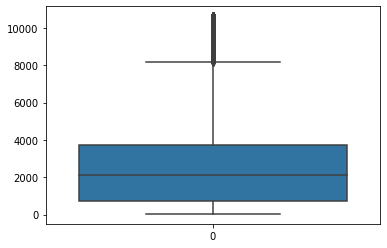

In [50]:
df1 = df_null['AppliedAmount']

ax = sns.boxplot(data = df1)

In [51]:
Q1_app = df_null['AppliedAmount'].quantile(0.25)
print(Q1_app)
Q3_app = df_null['AppliedAmount'].quantile(0.75)
print(Q3_app)
IQR_app = Q3_app - Q1_app
print(IQR_app)

740.0
3720.0
2980.0


In [52]:
UL_app = Q3_app +1.5*IQR_app
print(UL_app)
LL_app = Q1_app-1.5*IQR_app
print(LL_app)

8190.0
-3730.0


In [53]:
index = df_null[(df_null['AppliedAmount'] >UL_app)|(df_null['AppliedAmount'] < LL_app)].index
df_outliers = df_null.drop(index, inplace=True)

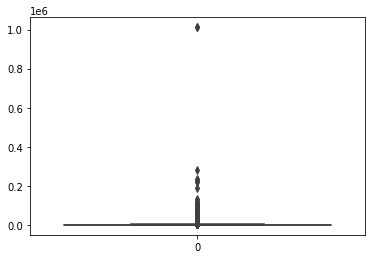

In [54]:
df2 = df_null['IncomeTotal']

ax = sns.boxplot(data=df2)

In [55]:
Q1_INCOME = df_null['IncomeTotal'].quantile(0.25)
print(Q1_INCOME)
Q3_INCOME = df_null['IncomeTotal'].quantile(0.75)
print(Q3_INCOME)
IQR_INCOME = Q3_INCOME - Q1_INCOME
print(IQR_INCOME)

860.0
1937.0
1077.0


In [56]:
UL_INCOME = Q3_INCOME +1.5*IQR_INCOME
print(UL_INCOME)
LL_INCOME = Q1_INCOME-1.5*IQR_INCOME
print(LL_INCOME)

3552.5
-755.5


In [57]:
index = df_null[(df_null['IncomeTotal'] >UL_INCOME)|(df_null['IncomeTotal'] < LL_INCOME)].index
df_outliers2 = df_null.drop(index, inplace=True)

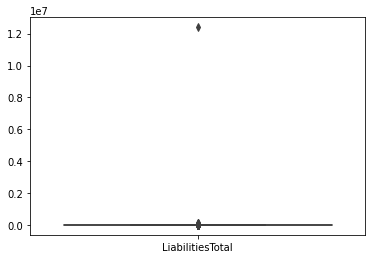

In [58]:
df3 = df_null[['LiabilitiesTotal']]

ax = sns.boxplot(data =df3)

In [59]:
Q1_Lia = df_null['LiabilitiesTotal'].quantile(0.25)
print(Q1_Lia)
Q3_Lia = df_null['LiabilitiesTotal'].quantile(0.75)
print(Q3_Lia)
IQR_Lia = Q3_Lia - Q1_Lia
print(IQR_Lia)

125.36
703.73
578.37


In [60]:
UL_Lia = Q3_Lia +1.5*IQR_Lia
print(UL_Lia)
LL_Lia = Q1_Lia-1.5*IQR_Lia
print(LL_Lia)

1571.285
-742.195


In [61]:
index = df_null[(df_null['LiabilitiesTotal'] >UL_Lia)|(df_null['LiabilitiesTotal'] < LL_Lia)].index
df_outliers3 = df_null.drop(index, inplace=True)

In [62]:
df.shape

(66359, 25)

In [63]:
#data_outliers_final = df_null[df_outliers,df_outliers2,df_outliers3]

In [64]:
#data_outliers_final = data_outliers_final.drop(data_outliers_final[(data_outliers_final.LiabilitiesTotal),(data_outliers_final.AppliedAmount), (data_outliers_final.IncomeTotal)]

In [65]:
# write your code here

cat_data= df.select_dtypes('object')
data = df.drop(cat_data.columns, axis=1)

In [66]:
data.head()

,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,AppliedAmount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,OccupationArea,HomeOwnershipType,IncomeTotal,LiabilitiesTotal,Restructured,NoOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Target
15,True,2.0,1,20,1.0,127.8233,25.0,6,NaN,7,2.0,2.0,NaN,1.0,NaN,900.0,0.0,False,1,0,1
58,True,2.0,1,19,1.0,159.7791,20.0,5,NaN,7,2.0,3.0,NaN,NaN,NaN,1400.0,0.0,False,1,0,0
106,True,2.0,1,19,1.0,223.6908,37.0,24,NaN,2,2.0,3.0,NaN,1.0,NaN,1800.0,0.0,False,3,0,1
184,True,2.0,1,19,1.0,191.7349,20.0,6,NaN,4,2.0,3.0,NaN,NaN,NaN,1800.0,0.0,False,0,0,0
218,True,2.0,1,43,1.0,63.9116,35.0,24,NaN,7,4.0,4.0,NaN,1.0,NaN,3000.0,0.0,False,0,0,0


In [67]:
bool_data= df.select_dtypes('bool')
data = df.drop(bool_data.columns, axis=1)

checking distribution of all numeric columns

In [68]:
data.head()  #numeric

,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,LiabilitiesTotal,LastPaymentOn,CreditScoreEsMicroL,NoOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Target
15,2.0,1,20,1.0,EE,127.8233,25.0,6,NaN,7,2.0,2.0,NaN,NaN,1.0,NaN,900.0,0.0,NaN,NaN,1,0,1
58,2.0,1,19,1.0,EE,159.7791,20.0,5,NaN,7,2.0,3.0,NaN,NaN,NaN,NaN,1400.0,0.0,2009-10-18,NaN,1,0,0
106,2.0,1,19,1.0,EE,223.6908,37.0,24,NaN,2,2.0,3.0,NaN,NaN,1.0,NaN,1800.0,0.0,2015-10-13,NaN,3,0,1
184,2.0,1,19,1.0,EE,191.7349,20.0,6,NaN,4,2.0,3.0,NaN,NaN,NaN,NaN,1800.0,0.0,2009-10-18,NaN,0,0,0
218,2.0,1,43,1.0,EE,63.9116,35.0,24,NaN,7,4.0,4.0,NaN,NaN,1.0,NaN,3000.0,0.0,2010-02-25,NaN,0,0,0


Now we will check the distribution of different categorical variables

In [69]:
data.VerificationType = df.VerificationType.astype('category')

In [70]:
def Veri_Type(x):
    if (x==0.0):
        return 'Other'
    elif x==1.0:
        return 'Income Unverified'
    elif x==2.0:
        return 'Income Unverified,cross-referenced by phone'
    elif x==3.0:
        return 'Income Verified'
    else:
        return 'Income and expenses verified'
data['VerificationType']=data.VerificationType.apply(Veri_Type)
data['VerificationType'].unique()

['Income Unverified,cross-referenced by phone', 'Income and expenses verified', 'Income Unverified', 'Income Verified', 'Other', NaN]
Categories (5, object): ['Income Unverified,cross-referenced by phone', 'Income and expenses verified', 'Income Unverified', 'Income Verified', 'Other']

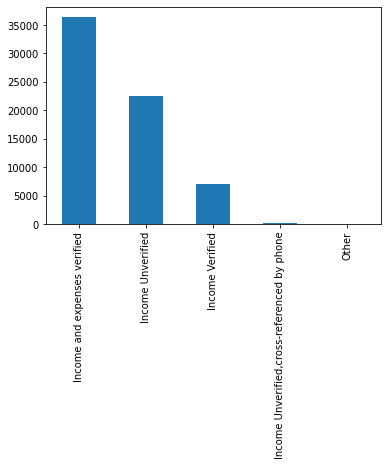

<Figure size 432x432 with 0 Axes>

In [71]:
# write your code here for VerificationType

import matplotlib.pyplot as plt

data['VerificationType'].value_counts().plot.bar(rot=0)

plt.xticks(rotation=90)
plt.figure(figsize=(6, 6))
plt.show()


In [72]:
data.Gender = df.Gender.astype('category')

In [73]:
def Gen(x):
    if (x==0.0):
        return 'Male'
    elif x==1.0:
        return 'Female'
    else:
        return 'Undefined'
data['Gender']=data.Gender.apply(Gen)
data['Gender'].unique()

['Female', 'Male', 'Undefined', NaN]
Categories (3, object): ['Female', 'Male', 'Undefined']

<AxesSubplot:>

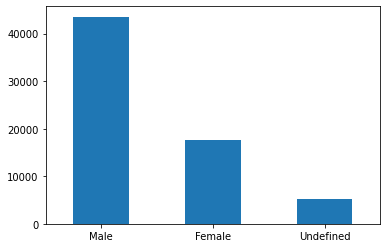

In [74]:
# write your code here Gender
data['Gender'].value_counts().plot.bar(rot=0)

As we can see from above in language code we have only descriptions for values 1,2,3,4,5,6, and 9 but it has other values too like 21,22,15,13,10 and 7 but they are very less it may happen they are local language codes whose decription is not present so we will be treated all these values as others

In [75]:
#df['LanguageCode'].nunique()
#threshold = 10

In [76]:
data.LanguageCode = df.LanguageCode.astype('category')

In [77]:
def Language(x):
    if (x==1):
        return 'Estonian'
    elif x==2:
        return 'English'
    elif x==3:
        return 'Russian'
    elif x==4:
        return 'Finnish'
    elif x==5:
        return 'German'
    elif x==6:
        return 'Spanish'
    elif x==9:
        return 'Slovakian'
    else:
        return 'Other'
data['LanguageCode']=data.LanguageCode.apply(Language)
data['LanguageCode'].unique()

array(['Estonian', 'Russian', 'Finnish', 'Spanish', 'English', 'Other',
       'Slovakian', 'German'], dtype=object)

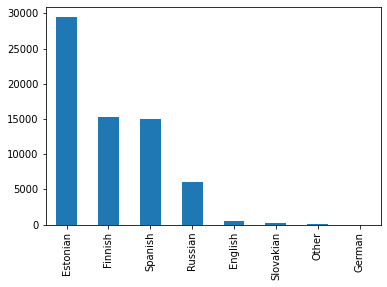

<Figure size 432x432 with 0 Axes>

In [78]:
#for languagecode
data['LanguageCode'].value_counts().plot.bar(rot=0)

plt.xticks(rotation=90)
plt.figure(figsize=(6, 6))
plt.show()

In [79]:
import seaborn as sns

<AxesSubplot:xlabel='LanguageCode', ylabel='count'>

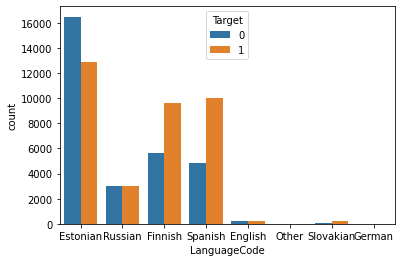

In [80]:
sns.countplot(data=data,x = 'LanguageCode', hue = 'Target')

In [81]:
data.UseOfLoan.value_counts()

-1      39558
 7       7303
 2       6710
 0       4911
 6       2388
 5       1364
 3       1324
 8       1102
 4       1035
 1        627
 102       16
 110       11
 104        4
 101        3
 107        2
 106        1
Name: UseOfLoan, dtype: int64

In [82]:
data.UseOfLoan = df.UseOfLoan.astype('category')

In [83]:
def UOL(x):
    if (x==-1):
        return 'No specified Purpose'
    elif x==2:
        return 'Home Improvement'
    elif x==0:
        return 'Loan Consolidation'
    elif x==6:
        return 'Vehicle'
    elif x==3:
        return 'Business'
    elif x==5:
        return 'Travel'
    elif x==8:
        return 'Health'
    elif x==4:
        return 'Education'
    elif x==1:
        return 'Real Estate'
    else:
        return 'Other'
data['UseOfLoan']=data.UseOfLoan.apply(UOL)
data['UseOfLoan'].unique()

array(['Other', 'Home Improvement', 'Education', 'Loan Consolidation',
       'Vehicle', 'Business', 'Health', 'Travel', 'Real Estate',
       'No specified Purpose'], dtype=object)

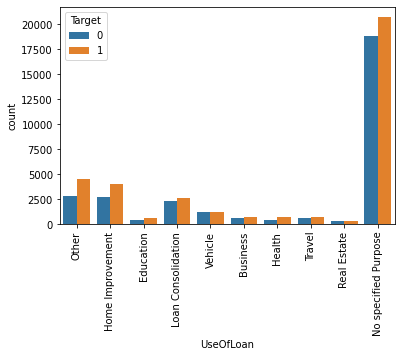

<Figure size 720x432 with 0 Axes>

In [84]:
# write your code here for UseOfLoan
sns.countplot(data=data,x = 'UseOfLoan', hue = 'Target')

plt.xticks(rotation=90)
plt.figure(figsize=(10, 6))
plt.show()

As we can see from above stats most of the loans are -1 category whose description is not avaialble in Bondoro website so we have dig deeper to find that in Bondora most of the loans happened for which purpose so we find in Bondora [Statistics Page](https://www.bondora.com/en/public-statistics) most of the loans around 34.81% are for Not set purpose. so we will encode -1 as Not set category

In [85]:
data.Education.value_counts()

 4.0    25368
 5.0    16821
 3.0    14611
 1.0     4846
 2.0     4674
 0.0        3
-1.0        2
Name: Education, dtype: int64

In [86]:
data.Education = data.Education.astype('category')

In [87]:
def Edu(x):
    if (x==-1):
        return 'Primary'
    elif x==2:
        return 'Basic'
    elif x==3:
        return 'Vocational'
    elif x==4:
        return 'Secondary'
    elif x==5:
        return 'Higher'
    else:
        return 'Other'
data['Education']=data.Education.apply(Edu)
data['Education'].unique()

array(['Basic', 'Secondary', 'Vocational', 'Higher', 'Other', nan,
       'Primary'], dtype=object)

<AxesSubplot:>

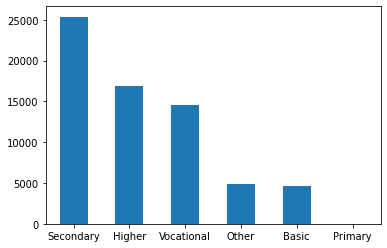

In [88]:
# write your code here for Education

data['Education'].value_counts().plot.bar(rot=0)

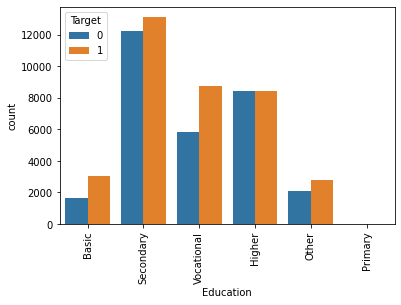

<Figure size 720x432 with 0 Axes>

In [89]:
sns.countplot(data=data,x = 'Education', hue = 'Target')

plt.xticks(rotation=90)
plt.figure(figsize=(10, 6))
plt.show()

In [90]:
data.EmploymentStatus = data.EmploymentStatus.astype('category')

In [91]:
def Emp(x):
    if (x==1):
        return 'Unemployed'
    elif x==2:
        return 'Partially Employed'
    elif x==3:
        return 'Fully Employed'
    elif x==4:
        return 'Self Employed'
    elif x==5:
        return 'Entrepreneur'
    elif x==6:
        return 'Retire'
    else:
        return 'Other'
data['EmploymentStatus']=data.EmploymentStatus.apply(Emp)
data['EmploymentStatus'].unique()

array([nan, 'Fully Employed', 'Entrepreneur', 'Self Employed',
       'Partially Employed', 'Retire', 'Other'], dtype=object)

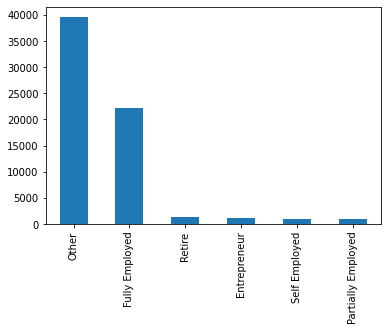

<Figure size 720x432 with 0 Axes>

In [92]:
# write your code here for EmploymentStatus

data['EmploymentStatus'].value_counts().plot.bar(rot=0)

plt.xticks(rotation=90)
plt.figure(figsize=(10, 6))
plt.show()

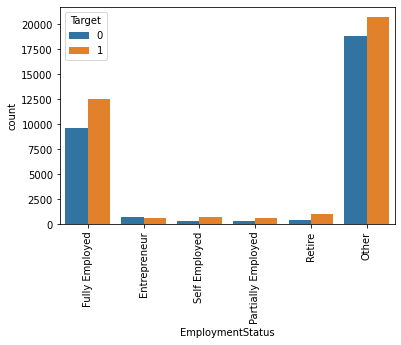

<Figure size 720x432 with 0 Axes>

In [93]:
sns.countplot(data=data,x = 'EmploymentStatus', hue = 'Target')

plt.xticks(rotation=90)
plt.figure(figsize=(10, 6))
plt.show()

In [94]:
data.MaritalStatus = data.MaritalStatus.astype('category')

In [95]:
def Marryst(x):
    if (x==1):
        return 'Married'
    elif x==2:
        return 'Cohabitant'
    elif x==3:
        return 'Single'
    elif x==4:
        return 'Divorced'
    elif x==5:
        return 'Widow'
    else:
        return 'Other'
data['MaritalStatus']=data.MaritalStatus.apply(Marryst)
data['MaritalStatus'].unique()

array(['Cohabitant', 'Single', 'Divorced', 'Married', 'Widow', 'Other',
       nan], dtype=object)

<AxesSubplot:>

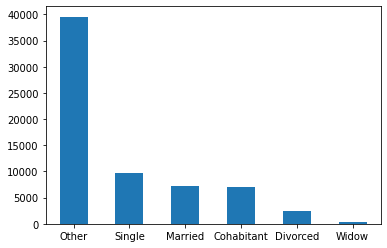

In [96]:
# write your code here for MaritalStatus
data['MaritalStatus'].value_counts().plot.bar(rot=0)

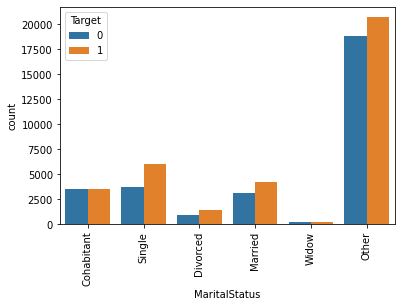

<Figure size 720x432 with 0 Axes>

In [97]:
sns.countplot(data=data,x = 'MaritalStatus', hue = 'Target')

plt.xticks(rotation=90)
plt.figure(figsize=(10, 6))
plt.show()

<AxesSubplot:>

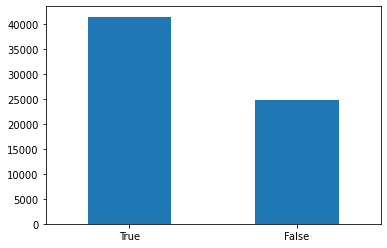

In [98]:
# write your code here for NewCreditCustome

bool_data['NewCreditCustomer'].value_counts().plot.bar(rot=0)

<AxesSubplot:>

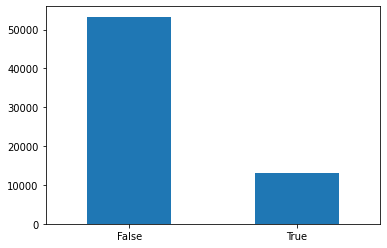

In [99]:
# write your code here for Restructured

bool_data['Restructured'].value_counts().plot.bar(rot=0)

True means the original maturity date of the loan has been increased by more than 60 days

In [100]:
data.OccupationArea = df.OccupationArea.astype('category')

In [101]:
data.OccupationArea.value_counts()

-1.0    39607
1.0      6228
7.0      2715
3.0      2503
6.0      2413
8.0      1806
9.0      1794
17.0     1668
10.0     1308
15.0     1227
16.0      934
11.0      762
19.0      755
14.0      680
18.0      418
4.0       414
13.0      385
12.0      338
5.0       279
2.0        86
0.0         3
Name: OccupationArea, dtype: int64

In [102]:
def Occup(x):
    if (x==-1):
        return 'Not Specified'
    elif x==1:
        return 'Other'
    elif x==2:
        return 'Mining'
    elif x==3:
        return 'Partially Employed'
    elif x==4:
        return 'Fully Employed'
    elif x==5:
        return 'Self Employed'
    elif x==6:
        return 'Entrepreneur'
    elif x==7:
        return 'Retire'
    elif x==8:
        return 'Transport and warehousing'
    elif x==9:
        return 'Hospitality and catering'
    elif x==10: 
        return 'Info and telecom'
    else:
        return 'Otherall'
data['OccupationArea']=data.OccupationArea.apply(Occup)
data['OccupationArea'].unique()

array(['Other', nan, 'Transport and warehousing',
       'Hospitality and catering', 'Otherall', 'Fully Employed',
       'Partially Employed', 'Entrepreneur', 'Info and telecom', 'Retire',
       'Not Specified', 'Mining', 'Self Employed'], dtype=object)

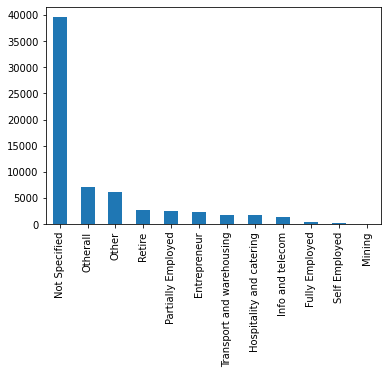

In [103]:
data['OccupationArea'].value_counts().plot.bar(rot=0)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

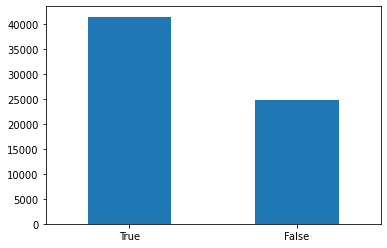

In [104]:
# write your code here for counts of NewCreditCustomer
bool_data['NewCreditCustomer'].value_counts().plot.bar(rot=0)

In [105]:
data.HomeOwnershipType = df.HomeOwnershipType.astype('category')

In [106]:
def HO(x):
    if (x==0):
        return 'Homeless'
    elif x==1:
        return 'Owner'
    elif x==2:
        return 'Living with Parents'
    elif x==3:
        return 'Tenant,Pre-furnished'
    elif x==4:
        return 'Tenant, Unfurnished'
    elif x==5:
        return 'Council House'
    elif x==6:
        return 'Joint Tenant'
    elif x==7:
        return 'Joint Ownership'
    elif x==8:
        return 'Mortgage'
    elif x==9:
        return 'Owner with encumbrance'
    else:
        return 'Other'
data['HomeOwnershipType']=data.HomeOwnershipType.apply(HO)
data['HomeOwnershipType'].unique()

array([nan, 'Tenant, Unfurnished', 'Living with Parents',
       'Tenant,Pre-furnished', 'Council House', 'Owner', 'Mortgage',
       'Joint Ownership', 'Joint Tenant', 'Owner with encumbrance',
       'Homeless', 'Other'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Owner'),
  Text(1, 0, 'Tenant,Pre-furnished'),
  Text(2, 0, 'Living with Parents'),
  Text(3, 0, 'Mortgage'),
  Text(4, 0, 'Tenant, Unfurnished'),
  Text(5, 0, 'Other'),
  Text(6, 0, 'Joint Ownership'),
  Text(7, 0, 'Joint Tenant'),
  Text(8, 0, 'Council House'),
  Text(9, 0, 'Owner with encumbrance'),
  Text(10, 0, 'Homeless')])

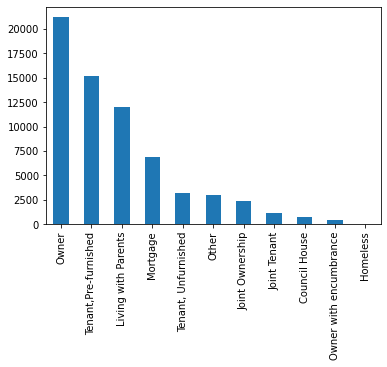

In [107]:
data['HomeOwnershipType'].value_counts().plot.bar(rot=0)
plt.xticks(rotation=90)

Loan restructured for only 15000 of the borrowers

In [108]:
df.head()

,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,LiabilitiesTotal,LastPaymentOn,Restructured,CreditScoreEsMicroL,NoOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Target
15,True,2.0,1,20,1.0,EE,127.8233,25.0,6,NaN,7,2.0,2.0,NaN,NaN,1.0,NaN,900.0,0.0,NaN,False,NaN,1,0,1
58,True,2.0,1,19,1.0,EE,159.7791,20.0,5,NaN,7,2.0,3.0,NaN,NaN,NaN,NaN,1400.0,0.0,2009-10-18,False,NaN,1,0,0
106,True,2.0,1,19,1.0,EE,223.6908,37.0,24,NaN,2,2.0,3.0,NaN,NaN,1.0,NaN,1800.0,0.0,2015-10-13,False,NaN,3,0,1
184,True,2.0,1,19,1.0,EE,191.7349,20.0,6,NaN,4,2.0,3.0,NaN,NaN,NaN,NaN,1800.0,0.0,2009-10-18,False,NaN,0,0,0
218,True,2.0,1,43,1.0,EE,63.9116,35.0,24,NaN,7,4.0,4.0,NaN,NaN,1.0,NaN,3000.0,0.0,2010-02-25,False,NaN,0,0,0


In [109]:
df.shape

(66359, 25)

In [110]:
# save the final data
data.to_csv('Bondora_preprocessed_final.csv',index=False)

In [111]:
df=pd.read_csv('Bondora_preprocessed_final.csv')

In [112]:
df.head()

,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,LiabilitiesTotal,LastPaymentOn,CreditScoreEsMicroL,NoOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Target
0,"Income Unverified,cross-referenced by phone",Estonian,20,Female,EE,127.8233,25.0,6,NaN,Other,Basic,Cohabitant,NaN,NaN,Other,NaN,900.0,0.0,NaN,NaN,1,0,1
1,"Income Unverified,cross-referenced by phone",Estonian,19,Female,EE,159.7791,20.0,5,NaN,Other,Basic,Single,NaN,NaN,NaN,NaN,1400.0,0.0,2009-10-18,NaN,1,0,0
2,"Income Unverified,cross-referenced by phone",Estonian,19,Female,EE,223.6908,37.0,24,NaN,Home Improvement,Basic,Single,NaN,NaN,Other,NaN,1800.0,0.0,2015-10-13,NaN,3,0,1
3,"Income Unverified,cross-referenced by phone",Estonian,19,Female,EE,191.7349,20.0,6,NaN,Education,Basic,Single,NaN,NaN,NaN,NaN,1800.0,0.0,2009-10-18,NaN,0,0,0
4,"Income Unverified,cross-referenced by phone",Estonian,43,Female,EE,63.9116,35.0,24,NaN,Other,Secondary,Divorced,NaN,NaN,Other,NaN,3000.0,0.0,2010-02-25,NaN,0,0,0


In [113]:
df.head()

,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,LiabilitiesTotal,LastPaymentOn,CreditScoreEsMicroL,NoOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Target
0,"Income Unverified,cross-referenced by phone",Estonian,20,Female,EE,127.8233,25.0,6,NaN,Other,Basic,Cohabitant,NaN,NaN,Other,NaN,900.0,0.0,NaN,NaN,1,0,1
1,"Income Unverified,cross-referenced by phone",Estonian,19,Female,EE,159.7791,20.0,5,NaN,Other,Basic,Single,NaN,NaN,NaN,NaN,1400.0,0.0,2009-10-18,NaN,1,0,0
2,"Income Unverified,cross-referenced by phone",Estonian,19,Female,EE,223.6908,37.0,24,NaN,Home Improvement,Basic,Single,NaN,NaN,Other,NaN,1800.0,0.0,2015-10-13,NaN,3,0,1
3,"Income Unverified,cross-referenced by phone",Estonian,19,Female,EE,191.7349,20.0,6,NaN,Education,Basic,Single,NaN,NaN,NaN,NaN,1800.0,0.0,2009-10-18,NaN,0,0,0
4,"Income Unverified,cross-referenced by phone",Estonian,43,Female,EE,63.9116,35.0,24,NaN,Other,Secondary,Divorced,NaN,NaN,Other,NaN,3000.0,0.0,2010-02-25,NaN,0,0,0


In [114]:
df.corr()

,Age,AppliedAmount,Interest,LoanDuration,MonthlyPayment,IncomeTotal,LiabilitiesTotal,NoOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Target
Age,1.000000,0.094319,-0.037940,0.038608,0.061264,0.154414,0.046369,0.036783,-0.003709,0.044914
AppliedAmount,0.094319,1.000000,-0.069962,0.261340,0.691126,0.265558,0.114924,-0.155202,-0.018295,0.065913
Interest,-0.037940,-0.069962,1.000000,0.012288,0.274912,0.135304,-0.135913,-0.258036,-0.064097,0.176109
LoanDuration,0.038608,0.261340,0.012288,1.000000,-0.081409,0.080838,-0.074980,-0.056829,0.010210,0.134764
MonthlyPayment,0.061264,0.691126,0.274912,-0.081409,1.000000,0.303503,0.070458,-0.187069,-0.026725,0.051376
IncomeTotal,0.154414,0.265558,0.135304,0.080838,0.303503,1.000000,0.257930,-0.079063,-0.035430,0.041875
LiabilitiesTotal,0.046369,0.114924,-0.135913,-0.074980,0.070458,0.257930,1.000000,0.095362,0.065225,0.075116
NoOfPreviousLoansBeforeLoan,0.036783,-0.155202,-0.258036,-0.056829,-0.187069,-0.079063,0.095362,1.000000,0.145509,-0.080491
PreviousEarlyRepaymentsCountBeforeLoan,-0.003709,-0.018295,-0.064097,0.010210,-0.026725,-0.035430,0.065225,0.145509,1.000000,-0.015589
Target,0.044914,0.065913,0.176109,0.134764,0.051376,0.041875,0.075116,-0.080491,-0.015589,1.000000


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66359 entries, 0 to 66358
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   VerificationType                        66325 non-null  object 
 1   LanguageCode                            66359 non-null  object 
 2   Age                                     66359 non-null  int64  
 3   Gender                                  66325 non-null  object 
 4   Country                                 66359 non-null  object 
 5   AppliedAmount                           66359 non-null  float64
 6   Interest                                66359 non-null  float64
 7   LoanDuration                            66359 non-null  int64  
 8   MonthlyPayment                          61698 non-null  float64
 9   UseOfLoan                               66359 non-null  object 
 10  Education                               66325 non-null  ob

In [116]:
data.isnull().sum()

VerificationType                             34
LanguageCode                                  0
Age                                           0
Gender                                       34
Country                                       0
AppliedAmount                                 0
Interest                                      0
LoanDuration                                  0
MonthlyPayment                             4661
UseOfLoan                                     0
Education                                    34
MaritalStatus                                34
EmploymentStatus                             79
EmploymentDurationCurrentEmployer           390
OccupationArea                               36
HomeOwnershipType                            53
IncomeTotal                                   0
LiabilitiesTotal                              0
LastPaymentOn                              4971
CreditScoreEsMicroL                       20765
NoOfPreviousLoansBeforeLoan             

In [117]:
df.head(2)

,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,LiabilitiesTotal,LastPaymentOn,CreditScoreEsMicroL,NoOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Target
0,"Income Unverified,cross-referenced by phone",Estonian,20,Female,EE,127.8233,25.0,6,NaN,Other,Basic,Cohabitant,NaN,NaN,Other,NaN,900.0,0.0,NaN,NaN,1,0,1
1,"Income Unverified,cross-referenced by phone",Estonian,19,Female,EE,159.7791,20.0,5,NaN,Other,Basic,Single,NaN,NaN,NaN,NaN,1400.0,0.0,2009-10-18,NaN,1,0,0


In [118]:
#X=df.iloc[:,0:22]

In [119]:
#X.columns  #independent columns

In [120]:
#y=df.iloc[:,-1]

In [121]:
#y.head()              #target column

In [122]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [123]:
#X_train.shape

In [124]:
df.isnull().sum()

VerificationType                             34
LanguageCode                                  0
Age                                           0
Gender                                       34
Country                                       0
AppliedAmount                                 0
Interest                                      0
LoanDuration                                  0
MonthlyPayment                             4661
UseOfLoan                                     0
Education                                    34
MaritalStatus                                34
EmploymentStatus                             79
EmploymentDurationCurrentEmployer           390
OccupationArea                               36
HomeOwnershipType                            53
IncomeTotal                                   0
LiabilitiesTotal                              0
LastPaymentOn                              4971
CreditScoreEsMicroL                       20765
NoOfPreviousLoansBeforeLoan             

In [125]:
#df.drop(['CreditScoreEsMicroL'], axis=1)

In [126]:
df.shape

(66359, 23)

In [127]:
df['VerificationType'].value_counts()

Income and expenses verified                   36398
Income Unverified                              22584
Income Verified                                 7085
Income Unverified,cross-referenced by phone      255
Other                                              3
Name: VerificationType, dtype: int64

In [128]:
df['Gender'].value_counts()

Male         43543
Female       17653
Undefined     5129
Name: Gender, dtype: int64

In [129]:
df['MonthlyPayment'].value_counts()

0.00       3018
237.84     1639
118.92      778
115.84      693
113.31      624
113.04      611
178.24      342
116.36      333
115.90      286
138.34      236
184.45      225
97.88       138
109.90      134
73.92       126
86.61       123
148.58      122
123.44      119
100.92      107
17.26       103
356.76       85
297.43       85
107.66       84
28.30        80
20.14        76
23.02        75
19.67        73
203.07       72
20.92        71
19.16        68
19.50        66
19.63        65
69.16        65
155.62       64
21.15        63
19.59        62
19.33        61
19.09        57
86.68        55
21.18        54
117.04       53
84.96        52
19.40        49
138.56       49
77.80        49
19.92        49
20.17        48
21.48        48
19.54        47
21.65        47
20.26        47
21.27        47
208.18       47
21.93        47
21.98        46
22.89        46
20.64        46
19.05        45
21.60        45
18.88        45
20.35        45
20.01        45
18.87        45
19.41   

In [130]:
df['Education'].value_counts()

Secondary     25368
Higher        16821
Vocational    14611
Other          4849
Basic          4674
Primary           2
Name: Education, dtype: int64

In [131]:
df['CreditScoreEsMicroL'].value_counts()

M      34997
M1      3498
M5      2157
M2      1430
M3      1405
M4      1318
M6       512
M8        97
M9        66
M7        65
M10       49
Name: CreditScoreEsMicroL, dtype: int64

In [132]:
df['HomeOwnershipType'].value_counts()

Owner                     21213
Tenant,Pre-furnished      15166
Living with Parents       12055
Mortgage                   6922
Tenant, Unfurnished        3160
Other                      2963
Joint Ownership            2415
Joint Tenant               1201
Council House               768
Owner with encumbrance      435
Homeless                      8
Name: HomeOwnershipType, dtype: int64

In [133]:
df.isnull().mean()*100

VerificationType                           0.051236
LanguageCode                               0.000000
Age                                        0.000000
Gender                                     0.051236
Country                                    0.000000
AppliedAmount                              0.000000
Interest                                   0.000000
LoanDuration                               0.000000
MonthlyPayment                             7.023915
UseOfLoan                                  0.000000
Education                                  0.051236
MaritalStatus                              0.051236
EmploymentStatus                           0.119049
EmploymentDurationCurrentEmployer          0.587712
OccupationArea                             0.054250
HomeOwnershipType                          0.079869
IncomeTotal                                0.000000
LiabilitiesTotal                           0.000000
LastPaymentOn                              7.491071
CreditScoreE

In [134]:
cols5percentmissing = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols5percentmissing

#columns having less than 5% missing values

['VerificationType',
 'Gender',
 'Education',
 'MaritalStatus',
 'EmploymentStatus',
 'EmploymentDurationCurrentEmployer',
 'OccupationArea',
 'HomeOwnershipType']

In [135]:
df[cols5percentmissing].sample(5)

,VerificationType,Gender,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType
42755,Income and expenses verified,Male,Other,Other,Other,UpTo1Year,Not Specified,"Tenant,Pre-furnished"
9381,Income and expenses verified,Female,Basic,Cohabitant,Fully Employed,UpTo2Years,Other,"Tenant,Pre-furnished"
31894,Income and expenses verified,Male,Secondary,Married,Fully Employed,UpTo1Year,Retire,Joint Ownership
6951,Income and expenses verified,Male,Secondary,Married,Fully Employed,UpTo3Years,Partially Employed,Mortgage
66328,Income Unverified,Male,Vocational,Single,Fully Employed,MoreThan5Years,Hospitality and catering,Living with Parents


In [136]:
len(df[cols5percentmissing].dropna())/len(df)
#to check how much data would remain after removing these missing values

0.9937310688828945

In [137]:
new_df = df[cols5percentmissing].dropna()
df.shape, new_df.shape

((66359, 23), (65943, 8))

In [138]:
#new_df.hist(bins=50, density=True, figsize=(10, 6))
#plt.show() #there is no numeric values in the new_df  so it will not show the histogram

<AxesSubplot:>

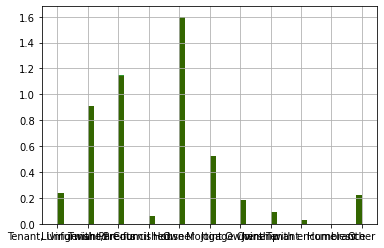

In [139]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['HomeOwnershipType'].hist(bins=50, ax=ax, density=True, color='red')

# data after applying cca, the argument alpha makes the color transparent, so we can
new_df['HomeOwnershipType'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

# overlay of the 2 distributions
#red colour histogram is behind the green histogram
#therefore no change in distribution

In [140]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['VerificationType'].value_counts() / len(df),             #divided value_counts by length of df  before cca

            # percentage of observations per category, cca data
            new_df['VerificationType'].value_counts() / len(new_df)       #after cca
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

#checking the ratios before performing cca and after performing cca
#for categorical values  the ratio before cca should be same after cca

,original,cca
Income and expenses verified,0.548501,0.547609
Income Unverified,0.340331,0.342220
Income Verified,0.106768,0.106880
"Income Unverified,cross-referenced by phone",0.003843,0.003291
Other,0.000045,NaN


In [141]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['Gender'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['Gender'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
Male,0.656173,0.657249
Female,0.266023,0.265093
Undefined,0.077292,0.077658


In [142]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['Education'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['Education'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
Secondary,0.382284,0.382133
Higher,0.253485,0.253962
Vocational,0.220181,0.220751
Other,0.073072,0.073366
Basic,0.070435,0.069757
Primary,0.000030,0.000030


In [143]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['MaritalStatus'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['MaritalStatus'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
Other,0.596166,0.599882
Single,0.146958,0.146369
Married,0.109209,0.108245
Cohabitant,0.104990,0.104211
Divorced,0.035866,0.035394
Widow,0.006299,0.005899


In [144]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['EmploymentStatus'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['EmploymentStatus'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
Other,0.596483,0.600109
Fully Employed,0.334649,0.335259
Retire,0.021323,0.018380
Entrepreneur,0.018385,0.018258
Self Employed,0.014165,0.014179
Partially Employed,0.013804,0.013815


In [145]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['EmploymentDurationCurrentEmployer'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['EmploymentDurationCurrentEmployer'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
MoreThan5Years,0.364668,0.366832
UpTo1Year,0.193568,0.194714
UpTo5Years,0.186531,0.187662
UpTo2Years,0.071806,0.072214
UpTo3Years,0.056240,0.056564
Retiree,0.046535,0.046828
UpTo4Years,0.037372,0.037548
Other,0.028949,0.029131
TrialPeriod,0.008454,0.008507


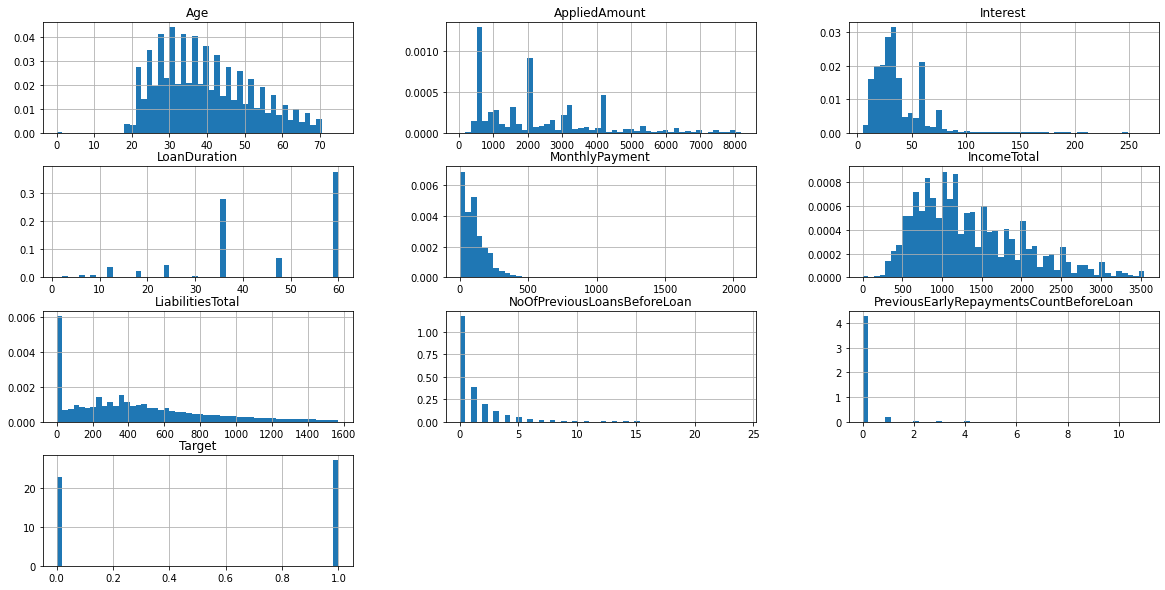

In [146]:
df.hist(bins=50, density=True, figsize=(20, 10))
plt.show()

<AxesSubplot:>

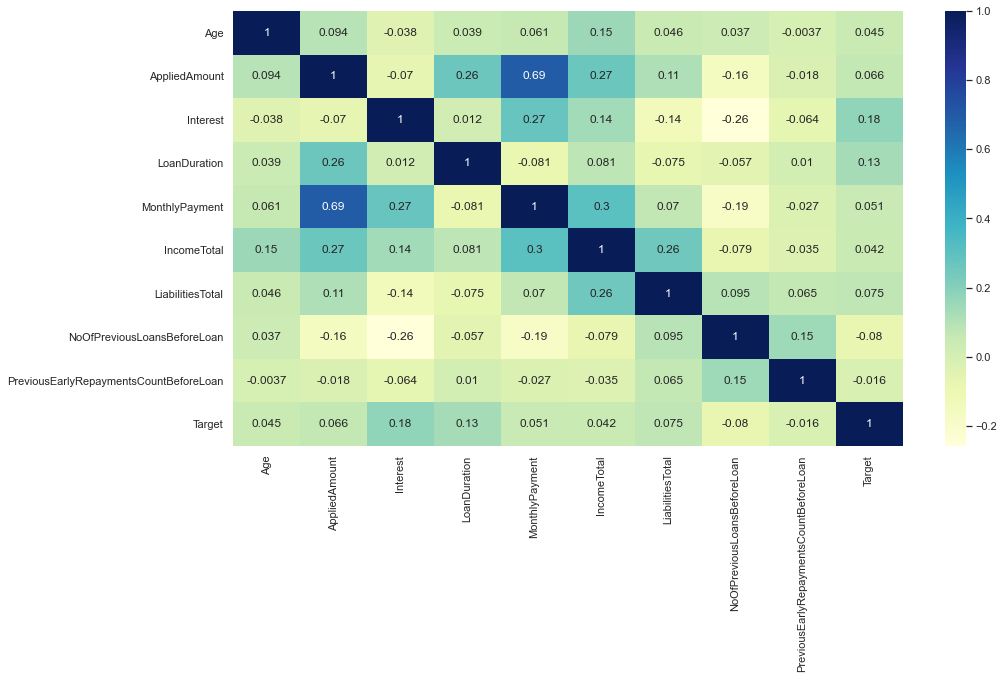

In [147]:
df.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [148]:
new_df.columns    #columns with less than 5% missing values

Index(['VerificationType', 'Gender', 'Education', 'MaritalStatus',
       'EmploymentStatus', 'EmploymentDurationCurrentEmployer',
       'OccupationArea', 'HomeOwnershipType'],
      dtype='object')

In [149]:
df.columns    #all columns

Index(['VerificationType', 'LanguageCode', 'Age', 'Gender', 'Country',
       'AppliedAmount', 'Interest', 'LoanDuration', 'MonthlyPayment',
       'UseOfLoan', 'Education', 'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'IncomeTotal', 'LiabilitiesTotal', 'LastPaymentOn',
       'CreditScoreEsMicroL', 'NoOfPreviousLoansBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'Target'],
      dtype='object')

In [150]:
df.isnull().sum()/len(df)*100

VerificationType                           0.051236
LanguageCode                               0.000000
Age                                        0.000000
Gender                                     0.051236
Country                                    0.000000
AppliedAmount                              0.000000
Interest                                   0.000000
LoanDuration                               0.000000
MonthlyPayment                             7.023915
UseOfLoan                                  0.000000
Education                                  0.051236
MaritalStatus                              0.051236
EmploymentStatus                           0.119049
EmploymentDurationCurrentEmployer          0.587712
OccupationArea                             0.054250
HomeOwnershipType                          0.079869
IncomeTotal                                0.000000
LiabilitiesTotal                           0.000000
LastPaymentOn                              7.491071
CreditScoreE

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66359 entries, 0 to 66358
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   VerificationType                        66325 non-null  object 
 1   LanguageCode                            66359 non-null  object 
 2   Age                                     66359 non-null  int64  
 3   Gender                                  66325 non-null  object 
 4   Country                                 66359 non-null  object 
 5   AppliedAmount                           66359 non-null  float64
 6   Interest                                66359 non-null  float64
 7   LoanDuration                            66359 non-null  int64  
 8   MonthlyPayment                          61698 non-null  float64
 9   UseOfLoan                               66359 non-null  object 
 10  Education                               66325 non-null  ob

In [152]:
#applying simple imputer on "MonthlyPayment" to fill missing values by median
#We'll be using sklearn

In [153]:
#from sklearn.impute import SimpleImputer

In [154]:
#imputer1 = SimpleImputer(strategy='median')

In [155]:
#from sklearn.compose import ColumnTransformer

#trf = ColumnTransformer([
    #('imputer1',imputer1,['MonthlyPayment']),
#],remainder='passthrough')

In [156]:
#trf.fit(X_train)

In [157]:
#trf.named_transformers_['imputer1'].statistics_

In [158]:
#X_train = trf.transform(X_train)
#X_test = trf.transform(X_test)

In [159]:
#X_train

In [160]:
#pd.DataFrame(X_train,columns = X_train.columns)

In [161]:
df.head()

,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,LiabilitiesTotal,LastPaymentOn,CreditScoreEsMicroL,NoOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Target
0,"Income Unverified,cross-referenced by phone",Estonian,20,Female,EE,127.8233,25.0,6,NaN,Other,Basic,Cohabitant,NaN,NaN,Other,NaN,900.0,0.0,NaN,NaN,1,0,1
1,"Income Unverified,cross-referenced by phone",Estonian,19,Female,EE,159.7791,20.0,5,NaN,Other,Basic,Single,NaN,NaN,NaN,NaN,1400.0,0.0,2009-10-18,NaN,1,0,0
2,"Income Unverified,cross-referenced by phone",Estonian,19,Female,EE,223.6908,37.0,24,NaN,Home Improvement,Basic,Single,NaN,NaN,Other,NaN,1800.0,0.0,2015-10-13,NaN,3,0,1
3,"Income Unverified,cross-referenced by phone",Estonian,19,Female,EE,191.7349,20.0,6,NaN,Education,Basic,Single,NaN,NaN,NaN,NaN,1800.0,0.0,2009-10-18,NaN,0,0,0
4,"Income Unverified,cross-referenced by phone",Estonian,43,Female,EE,63.9116,35.0,24,NaN,Other,Secondary,Divorced,NaN,NaN,Other,NaN,3000.0,0.0,2010-02-25,NaN,0,0,0


In [162]:
median =df['MonthlyPayment'].median()
mean = df['MonthlyPayment'].mean()
mode = df['MonthlyPayment'].mode()

In [163]:
print(median)
print(mean)
print(mode)

92.6
109.83528882621002
0    0.0
dtype: float64


In [164]:
df['MonthlyPayment'] = df['MonthlyPayment'].fillna(median)  #filling the null values with median

In [165]:
df.isnull().sum()

VerificationType                             34
LanguageCode                                  0
Age                                           0
Gender                                       34
Country                                       0
AppliedAmount                                 0
Interest                                      0
LoanDuration                                  0
MonthlyPayment                                0
UseOfLoan                                     0
Education                                    34
MaritalStatus                                34
EmploymentStatus                             79
EmploymentDurationCurrentEmployer           390
OccupationArea                               36
HomeOwnershipType                            53
IncomeTotal                                   0
LiabilitiesTotal                              0
LastPaymentOn                              4971
CreditScoreEsMicroL                       20765
NoOfPreviousLoansBeforeLoan             

In [166]:
df['VerificationType'].value_counts()

Income and expenses verified                   36398
Income Unverified                              22584
Income Verified                                 7085
Income Unverified,cross-referenced by phone      255
Other                                              3
Name: VerificationType, dtype: int64

In [167]:
df['VerificationType'] = df['VerificationType'].fillna('Income and expenses verified')

#flling null values (0.05%) with Income and expenses verified

In [168]:
df['VerificationType'].isnull().sum()

0

In [169]:
df['Gender'].value_counts()

Male         43543
Female       17653
Undefined     5129
Name: Gender, dtype: int64

In [170]:
df['Education'].value_counts()

Secondary     25368
Higher        16821
Vocational    14611
Other          4849
Basic          4674
Primary           2
Name: Education, dtype: int64

In [171]:
df['MaritalStatus'].value_counts()

Other         39561
Single         9752
Married        7247
Cohabitant     6967
Divorced       2380
Widow           418
Name: MaritalStatus, dtype: int64

In [172]:
df['EmploymentDurationCurrentEmployer'].value_counts()

MoreThan5Years    24199
UpTo1Year         12845
UpTo5Years        12378
UpTo2Years         4765
UpTo3Years         3732
Retiree            3088
UpTo4Years         2480
Other              1921
TrialPeriod         561
Name: EmploymentDurationCurrentEmployer, dtype: int64

In [173]:
df['HomeOwnershipType'].value_counts()

Owner                     21213
Tenant,Pre-furnished      15166
Living with Parents       12055
Mortgage                   6922
Tenant, Unfurnished        3160
Other                      2963
Joint Ownership            2415
Joint Tenant               1201
Council House               768
Owner with encumbrance      435
Homeless                      8
Name: HomeOwnershipType, dtype: int64

In [174]:
df['LastPaymentOn'].value_counts()

2020-01-20    937
2020-01-15    862
2020-01-13    764
2020-01-16    644
2020-01-21    639
2020-01-10    613
2020-01-14    507
2020-01-08    469
2020-01-06    469
2020-01-22    449
2020-01-23    439
2019-12-10    418
2020-01-03    414
2020-01-02    393
2020-01-24    390
2019-12-27    355
2019-12-16    345
2019-11-11    334
2020-01-09    322
2019-11-04    317
2019-12-23    299
2020-01-07    288
2019-12-02    278
2020-01-17    278
2019-12-13    268
2019-12-31    264
2019-12-18    260
2019-09-09    256
2019-12-17    255
2019-12-20    244
2019-12-09    239
2019-12-05    220
2019-12-11    220
2019-11-15    220
2019-12-04    219
2019-10-07    217
2019-09-13    217
2019-12-03    216
2019-11-18    206
2019-12-30    201
2019-11-08    199
2019-08-12    195
2019-12-19    194
2019-11-07    192
2019-08-19    192
2019-12-12    191
2019-11-25    187
2019-11-27    187
2019-10-15    185
2019-11-13    184
2019-10-10    184
2019-08-05    182
2019-10-28    179
2019-07-15    179
2019-10-03    174
2019-08-13

In [175]:
df['EmploymentStatus'].value_counts()

Other                 39582
Fully Employed        22207
Retire                 1415
Entrepreneur           1220
Self Employed           940
Partially Employed      916
Name: EmploymentStatus, dtype: int64

In [176]:
df['OccupationArea'].value_counts()

Not Specified                39607
Otherall                      7170
Other                         6228
Retire                        2715
Partially Employed            2503
Entrepreneur                  2413
Transport and warehousing     1806
Hospitality and catering      1794
Info and telecom              1308
Fully Employed                 414
Self Employed                  279
Mining                          86
Name: OccupationArea, dtype: int64

In [177]:
#filling missing values in remaining columns

df['Gender'] = df['Gender'].fillna('Male')
df['Education'] = df['Education'].fillna('Secondary')
df['MaritalStatus'] = df['MaritalStatus'].fillna('Other')
df['EmploymentStatus'] = df['EmploymentStatus'].fillna('Other')
df['EmploymentDurationCurrentEmployer'] = df['EmploymentDurationCurrentEmployer'].fillna('MoreThan5Years')
df['OccupationArea'] = df['OccupationArea'].fillna('Not Specified')
df['HomeOwnershipType'] = df['HomeOwnershipType'].fillna('Owner')
df['LastPaymentOn'] = df['LastPaymentOn'].fillna('2020-01-20')

In [178]:
df.isnull().sum()

VerificationType                              0
LanguageCode                                  0
Age                                           0
Gender                                        0
Country                                       0
AppliedAmount                                 0
Interest                                      0
LoanDuration                                  0
MonthlyPayment                                0
UseOfLoan                                     0
Education                                     0
MaritalStatus                                 0
EmploymentStatus                              0
EmploymentDurationCurrentEmployer             0
OccupationArea                                0
HomeOwnershipType                             0
IncomeTotal                                   0
LiabilitiesTotal                              0
LastPaymentOn                                 0
CreditScoreEsMicroL                       20765
NoOfPreviousLoansBeforeLoan             

In [179]:
df['CreditScoreEsMicroL'].value_counts

<bound method IndexOpsMixin.value_counts of 0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17        M3
18       NaN
19        M5
20        M1
21       NaN
22       NaN
23        M1
24       NaN
25       NaN
26       NaN
27       NaN
28       NaN
29       NaN
30       NaN
31       NaN
32       NaN
33       NaN
34        M3
35        M1
36       NaN
37       NaN
38        M9
39       NaN
40        M3
41       NaN
42        M2
43       NaN
44       NaN
45        M6
46       NaN
47       NaN
48       NaN
49       NaN
50       NaN
51       NaN
52        M3
53        M2
54        M3
55        M2
56       NaN
57       NaN
58        M1
59       NaN
60       NaN
61       NaN
62       NaN
63        M6
64       NaN
65       NaN
66       NaN
67       NaN
68       NaN
69        M4
70       NaN
71       NaN
72        M1
73     

<AxesSubplot:>

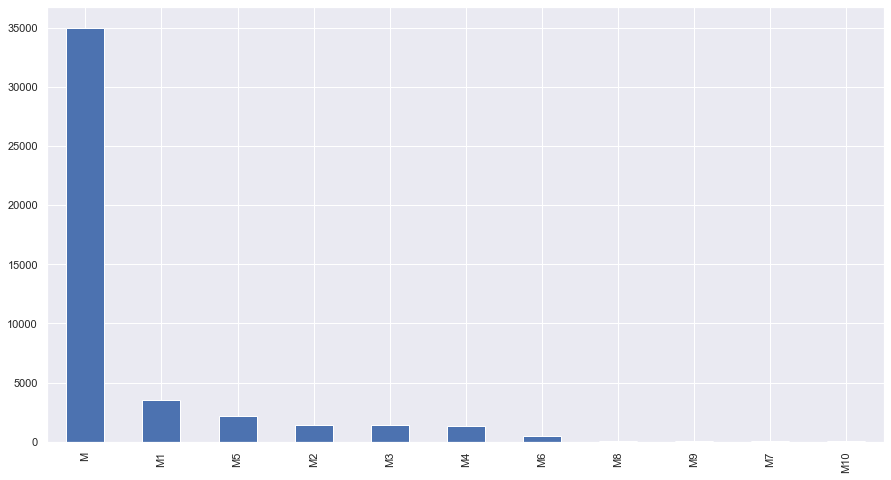

In [180]:
df['CreditScoreEsMicroL'].value_counts().plot(kind='bar')

In [181]:
df['CreditScoreEsMicroL'] = df['CreditScoreEsMicroL']. replace(np. nan, 'M1')

<AxesSubplot:>

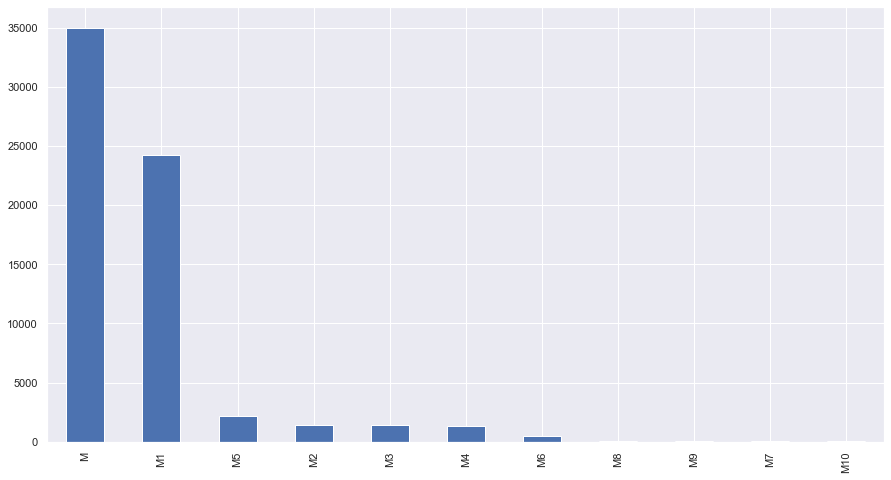

In [182]:
df['CreditScoreEsMicroL'].value_counts().plot(kind='bar')  #after filling nan values 

In [183]:
df.isnull().sum()

VerificationType                          0
LanguageCode                              0
Age                                       0
Gender                                    0
Country                                   0
AppliedAmount                             0
Interest                                  0
LoanDuration                              0
MonthlyPayment                            0
UseOfLoan                                 0
Education                                 0
MaritalStatus                             0
EmploymentStatus                          0
EmploymentDurationCurrentEmployer         0
OccupationArea                            0
HomeOwnershipType                         0
IncomeTotal                               0
LiabilitiesTotal                          0
LastPaymentOn                             0
CreditScoreEsMicroL                       0
NoOfPreviousLoansBeforeLoan               0
PreviousEarlyRepaymentsCountBeforeLoan    0
Target                          

### now there is no missing values in the DataFrame

In [184]:
#from sklearn.compose import ColumnTransformer
#transformer = ColumnTransformer(transformers=[
 #   ('tnf1',SimpleImputer(),['fever']),
 #   ('tnf2',OrdinalEncoder(categories=[['Mild','Strong']]),['cough']),
 #   ('tnf3',OneHotEncoder(sparse=False,drop='first'),['gender','city'])
#],remainder='passthrough')

In [185]:
df.head()

,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,LiabilitiesTotal,LastPaymentOn,CreditScoreEsMicroL,NoOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Target
0,"Income Unverified,cross-referenced by phone",Estonian,20,Female,EE,127.8233,25.0,6,92.6,Other,Basic,Cohabitant,Other,MoreThan5Years,Other,Owner,900.0,0.0,2020-01-20,M1,1,0,1
1,"Income Unverified,cross-referenced by phone",Estonian,19,Female,EE,159.7791,20.0,5,92.6,Other,Basic,Single,Other,MoreThan5Years,Not Specified,Owner,1400.0,0.0,2009-10-18,M1,1,0,0
2,"Income Unverified,cross-referenced by phone",Estonian,19,Female,EE,223.6908,37.0,24,92.6,Home Improvement,Basic,Single,Other,MoreThan5Years,Other,Owner,1800.0,0.0,2015-10-13,M1,3,0,1
3,"Income Unverified,cross-referenced by phone",Estonian,19,Female,EE,191.7349,20.0,6,92.6,Education,Basic,Single,Other,MoreThan5Years,Not Specified,Owner,1800.0,0.0,2009-10-18,M1,0,0,0
4,"Income Unverified,cross-referenced by phone",Estonian,43,Female,EE,63.9116,35.0,24,92.6,Other,Secondary,Divorced,Other,MoreThan5Years,Other,Owner,3000.0,0.0,2010-02-25,M1,0,0,0


In [186]:
df.shape

(66359, 23)

In [187]:
df.describe()

,Age,AppliedAmount,Interest,LoanDuration,MonthlyPayment,IncomeTotal,LiabilitiesTotal,NoOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Target
count,66359.000000,66359.000000,66359.000000,66359.000000,66359.000000,66359.000000,66359.000000,66359.000000,66359.000000,66359.000000
mean,39.317244,2322.923901,40.780546,44.713950,108.624697,1335.022765,430.454353,1.151539,0.077623,0.544131
std,12.215612,1745.371738,31.934702,15.916937,96.962656,664.193749,376.595671,2.025331,0.387832,0.498052
min,0.000000,31.955800,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,740.000000,23.080000,36.000000,38.500000,826.000000,114.000000,0.000000,0.000000,0.000000
50%,38.000000,2075.000000,32.000000,48.000000,92.600000,1200.000000,358.000000,0.000000,0.000000,1.000000
75%,48.000000,3185.000000,51.040000,60.000000,141.355000,1748.000000,645.955000,2.000000,0.000000,1.000000
max,75.000000,8187.000000,264.310000,60.000000,2058.320000,3550.000000,1571.030000,24.000000,11.000000,1.000000


In [188]:
df.dtypes

VerificationType                           object
LanguageCode                               object
Age                                         int64
Gender                                     object
Country                                    object
AppliedAmount                             float64
Interest                                  float64
LoanDuration                                int64
MonthlyPayment                            float64
UseOfLoan                                  object
Education                                  object
MaritalStatus                              object
EmploymentStatus                           object
EmploymentDurationCurrentEmployer          object
OccupationArea                             object
HomeOwnershipType                          object
IncomeTotal                               float64
LiabilitiesTotal                          float64
LastPaymentOn                              object
CreditScoreEsMicroL                        object


### Gender (Nominal)

In [189]:
df['Gender'].value_counts()

Male         43577
Female       17653
Undefined     5129
Name: Gender, dtype: int64

In [190]:
df01 = pd.get_dummies(df['Gender'],drop_first=True)
df01.head()                                         #ONE HOT ENCODING using pandas

,Male,Undefined
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [191]:
df = pd.concat([df01,df],axis =1)

In [192]:
df.drop('Gender',axis=1,inplace = True)

In [193]:
df.head()

,Male,Undefined,VerificationType,LanguageCode,Age,Country,AppliedAmount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,LiabilitiesTotal,LastPaymentOn,CreditScoreEsMicroL,NoOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Target
0,0,0,"Income Unverified,cross-referenced by phone",Estonian,20,EE,127.8233,25.0,6,92.6,Other,Basic,Cohabitant,Other,MoreThan5Years,Other,Owner,900.0,0.0,2020-01-20,M1,1,0,1
1,0,0,"Income Unverified,cross-referenced by phone",Estonian,19,EE,159.7791,20.0,5,92.6,Other,Basic,Single,Other,MoreThan5Years,Not Specified,Owner,1400.0,0.0,2009-10-18,M1,1,0,0
2,0,0,"Income Unverified,cross-referenced by phone",Estonian,19,EE,223.6908,37.0,24,92.6,Home Improvement,Basic,Single,Other,MoreThan5Years,Other,Owner,1800.0,0.0,2015-10-13,M1,3,0,1
3,0,0,"Income Unverified,cross-referenced by phone",Estonian,19,EE,191.7349,20.0,6,92.6,Education,Basic,Single,Other,MoreThan5Years,Not Specified,Owner,1800.0,0.0,2009-10-18,M1,0,0,0
4,0,0,"Income Unverified,cross-referenced by phone",Estonian,43,EE,63.9116,35.0,24,92.6,Other,Secondary,Divorced,Other,MoreThan5Years,Other,Owner,3000.0,0.0,2010-02-25,M1,0,0,0


In [194]:
df.dtypes

Male                                        uint8
Undefined                                   uint8
VerificationType                           object
LanguageCode                               object
Age                                         int64
Country                                    object
AppliedAmount                             float64
Interest                                  float64
LoanDuration                                int64
MonthlyPayment                            float64
UseOfLoan                                  object
Education                                  object
MaritalStatus                              object
EmploymentStatus                           object
EmploymentDurationCurrentEmployer          object
OccupationArea                             object
HomeOwnershipType                          object
IncomeTotal                               float64
LiabilitiesTotal                          float64
LastPaymentOn                              object


In [195]:
df['VerificationType'].value_counts()

Income and expenses verified                   36432
Income Unverified                              22584
Income Verified                                 7085
Income Unverified,cross-referenced by phone      255
Other                                              3
Name: VerificationType, dtype: int64

In [196]:
for feature in df.columns[:]:
    print (feature,":",len(df[feature].unique()),'labels')

Male : 2 labels
Undefined : 2 labels
VerificationType : 5 labels
LanguageCode : 8 labels
Age : 60 labels
Country : 4 labels
AppliedAmount : 416 labels
Interest : 5721 labels
LoanDuration : 21 labels
MonthlyPayment : 18293 labels
UseOfLoan : 10 labels
Education : 6 labels
MaritalStatus : 6 labels
EmploymentStatus : 6 labels
EmploymentDurationCurrentEmployer : 9 labels
OccupationArea : 12 labels
HomeOwnershipType : 11 labels
IncomeTotal : 2739 labels
LiabilitiesTotal : 24256 labels
LastPaymentOn : 2376 labels
CreditScoreEsMicroL : 11 labels
NoOfPreviousLoansBeforeLoan : 25 labels
PreviousEarlyRepaymentsCountBeforeLoan : 11 labels
Target : 2 labels


### Country

In [197]:
df['Country'].value_counts()                   #applying count/frequency encoding

EE    35521
FI    15548
ES    15006
SK      284
Name: Country, dtype: int64

In [198]:
country_map= df['Country'].value_counts().to_dict()    #converting to dictionary
country_map

#mapping with respect to values 

{'EE': 35521, 'FI': 15548, 'ES': 15006, 'SK': 284}

In [199]:
df['Country']=df['Country'].map(country_map)

df.head()

,Male,Undefined,VerificationType,LanguageCode,Age,Country,AppliedAmount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,LiabilitiesTotal,LastPaymentOn,CreditScoreEsMicroL,NoOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Target
0,0,0,"Income Unverified,cross-referenced by phone",Estonian,20,35521,127.8233,25.0,6,92.6,Other,Basic,Cohabitant,Other,MoreThan5Years,Other,Owner,900.0,0.0,2020-01-20,M1,1,0,1
1,0,0,"Income Unverified,cross-referenced by phone",Estonian,19,35521,159.7791,20.0,5,92.6,Other,Basic,Single,Other,MoreThan5Years,Not Specified,Owner,1400.0,0.0,2009-10-18,M1,1,0,0
2,0,0,"Income Unverified,cross-referenced by phone",Estonian,19,35521,223.6908,37.0,24,92.6,Home Improvement,Basic,Single,Other,MoreThan5Years,Other,Owner,1800.0,0.0,2015-10-13,M1,3,0,1
3,0,0,"Income Unverified,cross-referenced by phone",Estonian,19,35521,191.7349,20.0,6,92.6,Education,Basic,Single,Other,MoreThan5Years,Not Specified,Owner,1800.0,0.0,2009-10-18,M1,0,0,0
4,0,0,"Income Unverified,cross-referenced by phone",Estonian,43,35521,63.9116,35.0,24,92.6,Other,Secondary,Divorced,Other,MoreThan5Years,Other,Owner,3000.0,0.0,2010-02-25,M1,0,0,0


In [200]:
df['LanguageCode'].value_counts()

Estonian     29414
Finnish      15271
Spanish      14924
Russian       6005
English        451
Slovakian      284
Other            8
German           2
Name: LanguageCode, dtype: int64

In [201]:
Language_map= df['LanguageCode'].value_counts().to_dict()    #converting to dictionary
Language_map

{'Estonian': 29414,
 'Finnish': 15271,
 'Spanish': 14924,
 'Russian': 6005,
 'English': 451,
 'Slovakian': 284,
 'Other': 8,
 'German': 2}

In [202]:
df['LanguageCode']=df['LanguageCode'].map(Language_map)

In [203]:
df.head()

,Male,Undefined,VerificationType,LanguageCode,Age,Country,AppliedAmount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,LiabilitiesTotal,LastPaymentOn,CreditScoreEsMicroL,NoOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Target
0,0,0,"Income Unverified,cross-referenced by phone",29414,20,35521,127.8233,25.0,6,92.6,Other,Basic,Cohabitant,Other,MoreThan5Years,Other,Owner,900.0,0.0,2020-01-20,M1,1,0,1
1,0,0,"Income Unverified,cross-referenced by phone",29414,19,35521,159.7791,20.0,5,92.6,Other,Basic,Single,Other,MoreThan5Years,Not Specified,Owner,1400.0,0.0,2009-10-18,M1,1,0,0
2,0,0,"Income Unverified,cross-referenced by phone",29414,19,35521,223.6908,37.0,24,92.6,Home Improvement,Basic,Single,Other,MoreThan5Years,Other,Owner,1800.0,0.0,2015-10-13,M1,3,0,1
3,0,0,"Income Unverified,cross-referenced by phone",29414,19,35521,191.7349,20.0,6,92.6,Education,Basic,Single,Other,MoreThan5Years,Not Specified,Owner,1800.0,0.0,2009-10-18,M1,0,0,0
4,0,0,"Income Unverified,cross-referenced by phone",29414,43,35521,63.9116,35.0,24,92.6,Other,Secondary,Divorced,Other,MoreThan5Years,Other,Owner,3000.0,0.0,2010-02-25,M1,0,0,0


In [204]:
df['VerificationType'].value_counts()

Income and expenses verified                   36432
Income Unverified                              22584
Income Verified                                 7085
Income Unverified,cross-referenced by phone      255
Other                                              3
Name: VerificationType, dtype: int64

In [205]:
#Applying Target guided ordinal encoding for "VerificationType"   (Ordinal encoding0)

In [206]:
df.groupby(['VerificationType'])['Target'].mean()  #if the Income Verified, the probability of not defaulting is 54%

VerificationType
Income Unverified                              0.542109
Income Unverified,cross-referenced by phone    0.654902
Income Verified                                0.675229
Income and expenses verified                   0.519077
Other                                          1.000000
Name: Target, dtype: float64

In [207]:
df.groupby(['VerificationType'])['Target'].mean().sort_values()

VerificationType
Income and expenses verified                   0.519077
Income Unverified                              0.542109
Income Unverified,cross-referenced by phone    0.654902
Income Verified                                0.675229
Other                                          1.000000
Name: Target, dtype: float64

In [208]:
df.groupby(['VerificationType'])['Target'].mean().sort_values().index

Index(['Income and expenses verified', 'Income Unverified',
       'Income Unverified,cross-referenced by phone', 'Income Verified',
       'Other'],
      dtype='object', name='VerificationType')

In [209]:
ordinal_labels=df.groupby(['VerificationType'])['Target'].mean().sort_values().index
ordinal_labels

Index(['Income and expenses verified', 'Income Unverified',
       'Income Unverified,cross-referenced by phone', 'Income Verified',
       'Other'],
      dtype='object', name='VerificationType')

In [210]:
enumerate(ordinal_labels,0)

In [211]:
ordinal_labels2 ={k:i for i,k in enumerate(ordinal_labels,0)}
#based on the ranking, assigning labels

In [212]:
ordinal_labels2

{'Income and expenses verified': 0,
 'Income Unverified': 1,
 'Income Unverified,cross-referenced by phone': 2,
 'Income Verified': 3,
 'Other': 4}

In [213]:
df['VerificationType_Ordinal_labels']=df['VerificationType'].map(ordinal_labels2)

In [214]:
df.head()

,Male,Undefined,VerificationType,LanguageCode,Age,Country,AppliedAmount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,LiabilitiesTotal,LastPaymentOn,CreditScoreEsMicroL,NoOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Target,VerificationType_Ordinal_labels
0,0,0,"Income Unverified,cross-referenced by phone",29414,20,35521,127.8233,25.0,6,92.6,Other,Basic,Cohabitant,Other,MoreThan5Years,Other,Owner,900.0,0.0,2020-01-20,M1,1,0,1,2
1,0,0,"Income Unverified,cross-referenced by phone",29414,19,35521,159.7791,20.0,5,92.6,Other,Basic,Single,Other,MoreThan5Years,Not Specified,Owner,1400.0,0.0,2009-10-18,M1,1,0,0,2
2,0,0,"Income Unverified,cross-referenced by phone",29414,19,35521,223.6908,37.0,24,92.6,Home Improvement,Basic,Single,Other,MoreThan5Years,Other,Owner,1800.0,0.0,2015-10-13,M1,3,0,1,2
3,0,0,"Income Unverified,cross-referenced by phone",29414,19,35521,191.7349,20.0,6,92.6,Education,Basic,Single,Other,MoreThan5Years,Not Specified,Owner,1800.0,0.0,2009-10-18,M1,0,0,0,2
4,0,0,"Income Unverified,cross-referenced by phone",29414,43,35521,63.9116,35.0,24,92.6,Other,Secondary,Divorced,Other,MoreThan5Years,Other,Owner,3000.0,0.0,2010-02-25,M1,0,0,0,2


In [215]:
df.drop(['VerificationType'],axis=1,inplace = True)

In [216]:
df.head()

,Male,Undefined,LanguageCode,Age,Country,AppliedAmount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,LiabilitiesTotal,LastPaymentOn,CreditScoreEsMicroL,NoOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Target,VerificationType_Ordinal_labels
0,0,0,29414,20,35521,127.8233,25.0,6,92.6,Other,Basic,Cohabitant,Other,MoreThan5Years,Other,Owner,900.0,0.0,2020-01-20,M1,1,0,1,2
1,0,0,29414,19,35521,159.7791,20.0,5,92.6,Other,Basic,Single,Other,MoreThan5Years,Not Specified,Owner,1400.0,0.0,2009-10-18,M1,1,0,0,2
2,0,0,29414,19,35521,223.6908,37.0,24,92.6,Home Improvement,Basic,Single,Other,MoreThan5Years,Other,Owner,1800.0,0.0,2015-10-13,M1,3,0,1,2
3,0,0,29414,19,35521,191.7349,20.0,6,92.6,Education,Basic,Single,Other,MoreThan5Years,Not Specified,Owner,1800.0,0.0,2009-10-18,M1,0,0,0,2
4,0,0,29414,43,35521,63.9116,35.0,24,92.6,Other,Secondary,Divorced,Other,MoreThan5Years,Other,Owner,3000.0,0.0,2010-02-25,M1,0,0,0,2


### Education  (ordinal)

In [217]:
df['Education'].value_counts()

Secondary     25402
Higher        16821
Vocational    14611
Other          4849
Basic          4674
Primary           2
Name: Education, dtype: int64

In [218]:
#1 Primary education 2 Basic education 3 Vocational education 4 Secondary education 5 Higher education

In [219]:
edu_mapping = {"Primary":1,
              "Basic":2,
              "Vocational":3,
               "Secondary":4,
               "Higher":5,
               "Other":6}

In [220]:
df['Education_Num']=df["Education"].map(edu_mapping)

In [221]:
df.drop('Education',axis=1,inplace = True)     #dropped the original education column

In [222]:
df.head()

,Male,Undefined,LanguageCode,Age,Country,AppliedAmount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,LiabilitiesTotal,LastPaymentOn,CreditScoreEsMicroL,NoOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Target,VerificationType_Ordinal_labels,Education_Num
0,0,0,29414,20,35521,127.8233,25.0,6,92.6,Other,Cohabitant,Other,MoreThan5Years,Other,Owner,900.0,0.0,2020-01-20,M1,1,0,1,2,2
1,0,0,29414,19,35521,159.7791,20.0,5,92.6,Other,Single,Other,MoreThan5Years,Not Specified,Owner,1400.0,0.0,2009-10-18,M1,1,0,0,2,2
2,0,0,29414,19,35521,223.6908,37.0,24,92.6,Home Improvement,Single,Other,MoreThan5Years,Other,Owner,1800.0,0.0,2015-10-13,M1,3,0,1,2,2
3,0,0,29414,19,35521,191.7349,20.0,6,92.6,Education,Single,Other,MoreThan5Years,Not Specified,Owner,1800.0,0.0,2009-10-18,M1,0,0,0,2,2
4,0,0,29414,43,35521,63.9116,35.0,24,92.6,Other,Divorced,Other,MoreThan5Years,Other,Owner,3000.0,0.0,2010-02-25,M1,0,0,0,2,4


### Marital Status (Nominal)

In [223]:
df['MaritalStatus'].value_counts()

Other         39595
Single         9752
Married        7247
Cohabitant     6967
Divorced       2380
Widow           418
Name: MaritalStatus, dtype: int64

In [224]:
#using frequency encoding 

In [225]:
MARITAL_map= df['MaritalStatus'].value_counts().to_dict()    #converting to dictionary
MARITAL_map

{'Other': 39595,
 'Single': 9752,
 'Married': 7247,
 'Cohabitant': 6967,
 'Divorced': 2380,
 'Widow': 418}

In [226]:
df['MaritalStatus']=df['MaritalStatus'].map(MARITAL_map)
#mapped and replaced the MaritalStatus column with the new numeric MaritalStatus column

In [227]:
df.head()

,Male,Undefined,LanguageCode,Age,Country,AppliedAmount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,LiabilitiesTotal,LastPaymentOn,CreditScoreEsMicroL,NoOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Target,VerificationType_Ordinal_labels,Education_Num
0,0,0,29414,20,35521,127.8233,25.0,6,92.6,Other,6967,Other,MoreThan5Years,Other,Owner,900.0,0.0,2020-01-20,M1,1,0,1,2,2
1,0,0,29414,19,35521,159.7791,20.0,5,92.6,Other,9752,Other,MoreThan5Years,Not Specified,Owner,1400.0,0.0,2009-10-18,M1,1,0,0,2,2
2,0,0,29414,19,35521,223.6908,37.0,24,92.6,Home Improvement,9752,Other,MoreThan5Years,Other,Owner,1800.0,0.0,2015-10-13,M1,3,0,1,2,2
3,0,0,29414,19,35521,191.7349,20.0,6,92.6,Education,9752,Other,MoreThan5Years,Not Specified,Owner,1800.0,0.0,2009-10-18,M1,0,0,0,2,2
4,0,0,29414,43,35521,63.9116,35.0,24,92.6,Other,2380,Other,MoreThan5Years,Other,Owner,3000.0,0.0,2010-02-25,M1,0,0,0,2,4


### EmploymentDurationCurrentEmployer (Nominal)
(Nominal - because we cannot say that Retiree cannot pay the loan etc.)

In [228]:
df['EmploymentDurationCurrentEmployer'].value_counts()

MoreThan5Years    24589
UpTo1Year         12845
UpTo5Years        12378
UpTo2Years         4765
UpTo3Years         3732
Retiree            3088
UpTo4Years         2480
Other              1921
TrialPeriod         561
Name: EmploymentDurationCurrentEmployer, dtype: int64

In [229]:
EDCE_map= df['EmploymentDurationCurrentEmployer'].value_counts().to_dict()    #converting to dictionary
EDCE_map

{'MoreThan5Years': 24589,
 'UpTo1Year': 12845,
 'UpTo5Years': 12378,
 'UpTo2Years': 4765,
 'UpTo3Years': 3732,
 'Retiree': 3088,
 'UpTo4Years': 2480,
 'Other': 1921,
 'TrialPeriod': 561}

In [230]:
df['EmploymentDurationCurrentEmployer']=df['EmploymentDurationCurrentEmployer'].map(EDCE_map)

### EmploymentStatus

In [231]:
#1 Unemployed 2 Partially employed 3 Fully employed 4 Self-employed 5 Entrepreneur 6 Retiree

In [232]:
Emp_mapping = {"Unemployed":1,
              "Partially employed":2,
              "Fully employed":3,
               "Self-employed":4,
               "Entrepreneur":5,
               "Retiree":6,
              "Other":7}

In [233]:
df['EmploymentStatus']=df["EmploymentStatus"].map(Emp_mapping)

In [234]:
df.head()

,Male,Undefined,LanguageCode,Age,Country,AppliedAmount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,LiabilitiesTotal,LastPaymentOn,CreditScoreEsMicroL,NoOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Target,VerificationType_Ordinal_labels,Education_Num
0,0,0,29414,20,35521,127.8233,25.0,6,92.6,Other,6967,7.0,24589,Other,Owner,900.0,0.0,2020-01-20,M1,1,0,1,2,2
1,0,0,29414,19,35521,159.7791,20.0,5,92.6,Other,9752,7.0,24589,Not Specified,Owner,1400.0,0.0,2009-10-18,M1,1,0,0,2,2
2,0,0,29414,19,35521,223.6908,37.0,24,92.6,Home Improvement,9752,7.0,24589,Other,Owner,1800.0,0.0,2015-10-13,M1,3,0,1,2,2
3,0,0,29414,19,35521,191.7349,20.0,6,92.6,Education,9752,7.0,24589,Not Specified,Owner,1800.0,0.0,2009-10-18,M1,0,0,0,2,2
4,0,0,29414,43,35521,63.9116,35.0,24,92.6,Other,2380,7.0,24589,Other,Owner,3000.0,0.0,2010-02-25,M1,0,0,0,2,4


### OccupationArea (Nominal)

In [235]:
df['OccupationArea'].value_counts()

Not Specified                39643
Otherall                      7170
Other                         6228
Retire                        2715
Partially Employed            2503
Entrepreneur                  2413
Transport and warehousing     1806
Hospitality and catering      1794
Info and telecom              1308
Fully Employed                 414
Self Employed                  279
Mining                          86
Name: OccupationArea, dtype: int64

In [236]:
Occu_map= df['OccupationArea'].value_counts().to_dict()

In [237]:
df['OccupationArea']=df['OccupationArea'].map(Occu_map)

### HomeOwnershipType (Ordinal)

0 Homeless 1 Owner 2 Living with parents 3 Tenant, pre-furnished property 4 Tenant, unfurnished property 5 Council house 
6 Joint tenant 7 Joint ownership 8 Mortgage 9 Owner with encumbrance 10 Other

In [238]:
HomeOT_mapping = {"Homeless":0,
              "Owner":1,
              "Living with parents":2,
              "Tenant, pre-furnished property":3,
               "Tenant, unfurnished property":4,
               "Council house":5,
               "Joint tenant":6,
              "Joint ownership":7,
                 "Mortgage":8,
                 "Owner with encumbrance":9,
                 "Other":10}

In [239]:
df['HomeOwnershipType']=df["HomeOwnershipType"].map(HomeOT_mapping)

In [240]:
df.head()

,Male,Undefined,LanguageCode,Age,Country,AppliedAmount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,LiabilitiesTotal,LastPaymentOn,CreditScoreEsMicroL,NoOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Target,VerificationType_Ordinal_labels,Education_Num
0,0,0,29414,20,35521,127.8233,25.0,6,92.6,Other,6967,7.0,24589,6228,1.0,900.0,0.0,2020-01-20,M1,1,0,1,2,2
1,0,0,29414,19,35521,159.7791,20.0,5,92.6,Other,9752,7.0,24589,39643,1.0,1400.0,0.0,2009-10-18,M1,1,0,0,2,2
2,0,0,29414,19,35521,223.6908,37.0,24,92.6,Home Improvement,9752,7.0,24589,6228,1.0,1800.0,0.0,2015-10-13,M1,3,0,1,2,2
3,0,0,29414,19,35521,191.7349,20.0,6,92.6,Education,9752,7.0,24589,39643,1.0,1800.0,0.0,2009-10-18,M1,0,0,0,2,2
4,0,0,29414,43,35521,63.9116,35.0,24,92.6,Other,2380,7.0,24589,6228,1.0,3000.0,0.0,2010-02-25,M1,0,0,0,2,4


### UseOfLoan

In [241]:
df['UseOfLoan'].value_counts()

No specified Purpose    39558
Other                    7340
Home Improvement         6710
Loan Consolidation       4911
Vehicle                  2388
Travel                   1364
Business                 1324
Health                   1102
Education                1035
Real Estate               627
Name: UseOfLoan, dtype: int64

In [242]:
UseOL= df['UseOfLoan'].value_counts().to_dict()

In [243]:
df['UseOfLoan']=df['UseOfLoan'].map(UseOL)

### CreditScoreEsMicroL  (ordinal)

In [244]:
df['CreditScoreEsMicroL'].value_counts()
#a measure of the probability of default one month ahead; the score is given on a 10-grade scale, 
#from the best score to the worst: M1, M2, M3, M4, M5, M6, M7, M8, M9, M10.

M      34997
M1     24263
M5      2157
M2      1430
M3      1405
M4      1318
M6       512
M8        97
M9        66
M7        65
M10       49
Name: CreditScoreEsMicroL, dtype: int64

In [245]:
CreditScore_mapping = {"M":0,
              "M1":1,
              "M2":2,
              "M3":3,
               "M4":4,
               "M5":5,
               "M6":6,
              "M7":7,
                 "M8":8,
                 "M9":9,
                 "M10":10}

In [246]:
df['CreditScoreEsMicroL']=df["CreditScoreEsMicroL"].map(CreditScore_mapping)

In [247]:
df.head()

,Male,Undefined,LanguageCode,Age,Country,AppliedAmount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,LiabilitiesTotal,LastPaymentOn,CreditScoreEsMicroL,NoOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Target,VerificationType_Ordinal_labels,Education_Num
0,0,0,29414,20,35521,127.8233,25.0,6,92.6,7340,6967,7.0,24589,6228,1.0,900.0,0.0,2020-01-20,1,1,0,1,2,2
1,0,0,29414,19,35521,159.7791,20.0,5,92.6,7340,9752,7.0,24589,39643,1.0,1400.0,0.0,2009-10-18,1,1,0,0,2,2
2,0,0,29414,19,35521,223.6908,37.0,24,92.6,6710,9752,7.0,24589,6228,1.0,1800.0,0.0,2015-10-13,1,3,0,1,2,2
3,0,0,29414,19,35521,191.7349,20.0,6,92.6,1035,9752,7.0,24589,39643,1.0,1800.0,0.0,2009-10-18,1,0,0,0,2,2
4,0,0,29414,43,35521,63.9116,35.0,24,92.6,7340,2380,7.0,24589,6228,1.0,3000.0,0.0,2010-02-25,1,0,0,0,2,4


In [248]:
df.dtypes

Male                                        uint8
Undefined                                   uint8
LanguageCode                                int64
Age                                         int64
Country                                     int64
AppliedAmount                             float64
Interest                                  float64
LoanDuration                                int64
MonthlyPayment                            float64
UseOfLoan                                   int64
MaritalStatus                               int64
EmploymentStatus                          float64
EmploymentDurationCurrentEmployer           int64
OccupationArea                              int64
HomeOwnershipType                         float64
IncomeTotal                               float64
LiabilitiesTotal                          float64
LastPaymentOn                              object
CreditScoreEsMicroL                         int64
NoOfPreviousLoansBeforeLoan                 int64


### LastPaymentOn

In [249]:
df['LastPaymentOn'].value_counts()

2020-01-20    5908
2020-01-15     862
2020-01-13     764
2020-01-16     644
2020-01-21     639
2020-01-10     613
2020-01-14     507
2020-01-08     469
2020-01-06     469
2020-01-22     449
2020-01-23     439
2019-12-10     418
2020-01-03     414
2020-01-02     393
2020-01-24     390
2019-12-27     355
2019-12-16     345
2019-11-11     334
2020-01-09     322
2019-11-04     317
2019-12-23     299
2020-01-07     288
2019-12-02     278
2020-01-17     278
2019-12-13     268
2019-12-31     264
2019-12-18     260
2019-09-09     256
2019-12-17     255
2019-12-20     244
2019-12-09     239
2019-12-05     220
2019-12-11     220
2019-11-15     220
2019-12-04     219
2019-10-07     217
2019-09-13     217
2019-12-03     216
2019-11-18     206
2019-12-30     201
2019-11-08     199
2019-08-12     195
2019-12-19     194
2019-11-07     192
2019-08-19     192
2019-12-12     191
2019-11-25     187
2019-11-27     187
2019-10-15     185
2019-11-13     184
2019-10-10     184
2019-08-05     182
2019-10-28  

In [250]:
# Converting to datetime datatype
df['LastPaymentOn'] = pd.to_datetime(df['LastPaymentOn'])

In [251]:
df.dtypes

Male                                               uint8
Undefined                                          uint8
LanguageCode                                       int64
Age                                                int64
Country                                            int64
AppliedAmount                                    float64
Interest                                         float64
LoanDuration                                       int64
MonthlyPayment                                   float64
UseOfLoan                                          int64
MaritalStatus                                      int64
EmploymentStatus                                 float64
EmploymentDurationCurrentEmployer                  int64
OccupationArea                                     int64
HomeOwnershipType                                float64
IncomeTotal                                      float64
LiabilitiesTotal                                 float64
LastPaymentOn                  

In [252]:
#extracting YEAR
df['LastPayment_date_year'] = df['LastPaymentOn'].dt.year

In [253]:
df['LastPayment_date_month'] = df['LastPaymentOn'].dt.month

In [254]:
df['LastPayment_date_day'] = df['LastPaymentOn'].dt.day

In [255]:
df.drop('LastPaymentOn',axis=1,inplace = True)

In [256]:
df.dtypes

Male                                        uint8
Undefined                                   uint8
LanguageCode                                int64
Age                                         int64
Country                                     int64
AppliedAmount                             float64
Interest                                  float64
LoanDuration                                int64
MonthlyPayment                            float64
UseOfLoan                                   int64
MaritalStatus                               int64
EmploymentStatus                          float64
EmploymentDurationCurrentEmployer           int64
OccupationArea                              int64
HomeOwnershipType                         float64
IncomeTotal                               float64
LiabilitiesTotal                          float64
CreditScoreEsMicroL                         int64
NoOfPreviousLoansBeforeLoan                 int64
PreviousEarlyRepaymentsCountBeforeLoan      int64


In [257]:
df['TARGET']=df['Target']  #adding same target column as TARGET column in the last of dataframe

In [258]:
df.head()

,Male,Undefined,LanguageCode,Age,Country,AppliedAmount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,LiabilitiesTotal,CreditScoreEsMicroL,NoOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Target,VerificationType_Ordinal_labels,Education_Num,LastPayment_date_year,LastPayment_date_month,LastPayment_date_day,TARGET
0,0,0,29414,20,35521,127.8233,25.0,6,92.6,7340,6967,7.0,24589,6228,1.0,900.0,0.0,1,1,0,1,2,2,2020,1,20,1
1,0,0,29414,19,35521,159.7791,20.0,5,92.6,7340,9752,7.0,24589,39643,1.0,1400.0,0.0,1,1,0,0,2,2,2009,10,18,0
2,0,0,29414,19,35521,223.6908,37.0,24,92.6,6710,9752,7.0,24589,6228,1.0,1800.0,0.0,1,3,0,1,2,2,2015,10,13,1
3,0,0,29414,19,35521,191.7349,20.0,6,92.6,1035,9752,7.0,24589,39643,1.0,1800.0,0.0,1,0,0,0,2,2,2009,10,18,0
4,0,0,29414,43,35521,63.9116,35.0,24,92.6,7340,2380,7.0,24589,6228,1.0,3000.0,0.0,1,0,0,0,2,4,2010,2,25,0


In [259]:
df.drop(['Target'],axis =1, inplace = True)  #dropping the old Target column

In [260]:
df.head()

,Male,Undefined,LanguageCode,Age,Country,AppliedAmount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,LiabilitiesTotal,CreditScoreEsMicroL,NoOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,VerificationType_Ordinal_labels,Education_Num,LastPayment_date_year,LastPayment_date_month,LastPayment_date_day,TARGET
0,0,0,29414,20,35521,127.8233,25.0,6,92.6,7340,6967,7.0,24589,6228,1.0,900.0,0.0,1,1,0,2,2,2020,1,20,1
1,0,0,29414,19,35521,159.7791,20.0,5,92.6,7340,9752,7.0,24589,39643,1.0,1400.0,0.0,1,1,0,2,2,2009,10,18,0
2,0,0,29414,19,35521,223.6908,37.0,24,92.6,6710,9752,7.0,24589,6228,1.0,1800.0,0.0,1,3,0,2,2,2015,10,13,1
3,0,0,29414,19,35521,191.7349,20.0,6,92.6,1035,9752,7.0,24589,39643,1.0,1800.0,0.0,1,0,0,2,2,2009,10,18,0
4,0,0,29414,43,35521,63.9116,35.0,24,92.6,7340,2380,7.0,24589,6228,1.0,3000.0,0.0,1,0,0,2,4,2010,2,25,0


In [261]:
df.dtypes

Male                                        uint8
Undefined                                   uint8
LanguageCode                                int64
Age                                         int64
Country                                     int64
AppliedAmount                             float64
Interest                                  float64
LoanDuration                                int64
MonthlyPayment                            float64
UseOfLoan                                   int64
MaritalStatus                               int64
EmploymentStatus                          float64
EmploymentDurationCurrentEmployer           int64
OccupationArea                              int64
HomeOwnershipType                         float64
IncomeTotal                               float64
LiabilitiesTotal                          float64
CreditScoreEsMicroL                         int64
NoOfPreviousLoansBeforeLoan                 int64
PreviousEarlyRepaymentsCountBeforeLoan      int64


In [262]:
df.fillna(mean, inplace=True)

In [263]:
#df.drop(['LanguageCode','Age','LastPayment_date_day'],axis =1, inplace = True)

In [264]:
X = df.iloc[:, 0:25].values
y = df.iloc[:, 25].values

In [265]:
#X = df.iloc[:, 0:22].values
#y = df.iloc[:, 22].values

In [266]:
#scale the data to be between -1 to 1
#mean = 0, std =  1

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
  
X_Scaled = sc.fit_transform(X)
X_Scaled

array([[-1.38303363, -0.28942379,  1.0552345 , ...,  1.03963161,
        -1.25908652,  0.645542  ],
       [-1.38303363, -0.28942379,  1.0552345 , ..., -5.7254345 ,
         0.94179241,  0.39834565],
       [-1.38303363, -0.28942379,  1.0552345 , ..., -2.03539844,
         0.94179241, -0.21964524],
       ...,
       [ 0.72304822, -0.28942379, -0.61083045, ...,  1.03963161,
        -1.25908652,  0.27474747],
       [-1.38303363, -0.28942379,  1.0552345 , ...,  0.4246256 ,
         1.43087662,  0.645542  ],
       [-1.38303363, -0.28942379,  1.0552345 , ...,  0.4246256 ,
         0.94179241,  0.02755111]])

In [267]:
from sklearn.model_selection import train_test_split
  
X_train, X_test, y_train, y_test = train_test_split( X_Scaled, y, test_size = 0.3, random_state = 0)

In [268]:
X_train

array([[-1.38303363, -0.28942379,  1.0552345 , ..., -0.80538642,
         0.94179241, -0.71403796],
       [-1.38303363, -0.28942379,  1.0552345 , ...,  1.03963161,
        -1.25908652,  0.645542  ],
       [ 0.72304822, -0.28942379,  1.0552345 , ...,  1.03963161,
        -1.25908652,  1.13993472],
       ...,
       [ 0.72304822, -0.28942379,  1.0552345 , ..., -1.42039243,
         0.45270821,  1.88152379],
       [ 0.72304822, -0.28942379, -0.61083045, ...,  0.4246256 ,
         0.2081661 , -0.83763614],
       [ 0.72304822, -0.28942379,  1.0552345 , ...,  1.03963161,
        -1.25908652,  0.15114929]])

In [277]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [270]:
svc = SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

In [271]:
svc.score(X_test,y_test)

0.7267932489451476

In [272]:
accuracy_score(y_test,y_pred) #testing accuracy

0.7267932489451476

In [273]:
y_pred_train = svc.predict(X_train)
accuracy_score(y_train,y_pred_train)  #training accuracy

0.7511571333232869

In [274]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.64      0.68      9134
           1       0.73      0.80      0.76     10774

    accuracy                           0.73     19908
   macro avg       0.73      0.72      0.72     19908
weighted avg       0.73      0.73      0.72     19908



<AxesSubplot:>

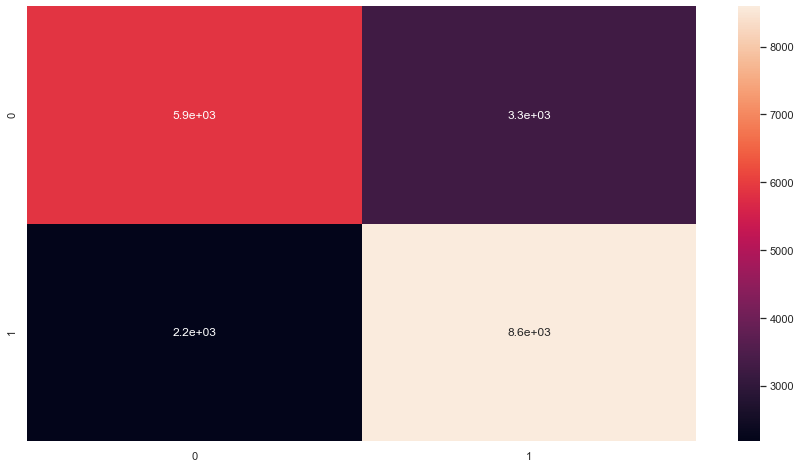

In [290]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)

In [279]:
from sklearn.model_selection import GridSearchCV

In [280]:
param_grid = {'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001]} #"kernel":["rbf","poly","linear","sigmoid","precomputed"]}

#created a dictionary called param_grid and fill out some parameter for C and gamma

#to find out the best parameter

In [281]:
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose = 2)
grid.fit(X_train,y_train)--

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time= 4.0min
[CV] END .....................................C=0.1, gamma=1; total time= 4.0min
[CV] END .....................................C=0.1, gamma=1; total time= 4.0min
[CV] END .....................................C=0.1, gamma=1; total time= 4.1min
[CV] END .....................................C=0.1, gamma=1; total time= 4.1min
[CV] END ...................................C=0.1, gamma=0.1; total time= 1.7min
[CV] END ...................................C=0.1, gamma=0.1; total time= 1.8min
[CV] END ...................................C=0.1, gamma=0.1; total time= 1.7min
[CV] END ...................................C=0.1, gamma=0.1; total time= 1.7min
[CV] END ...................................C=0.1, gamma=0.1; total time= 1.7min
[CV] END ..................................C=0.1, gamma=0.01; total time= 1.6min
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [282]:
grid.best_params_

{'C': 1, 'gamma': 0.1}

In [283]:
grid_predictions = grid.predict(X_test)

In [284]:
print("accuracy score:")
print(accuracy_score(y_test,grid_predictions))

accuracy score:
0.7344283705043199


In [286]:
#print(confusion_matrix(y_test,grid_predictions))

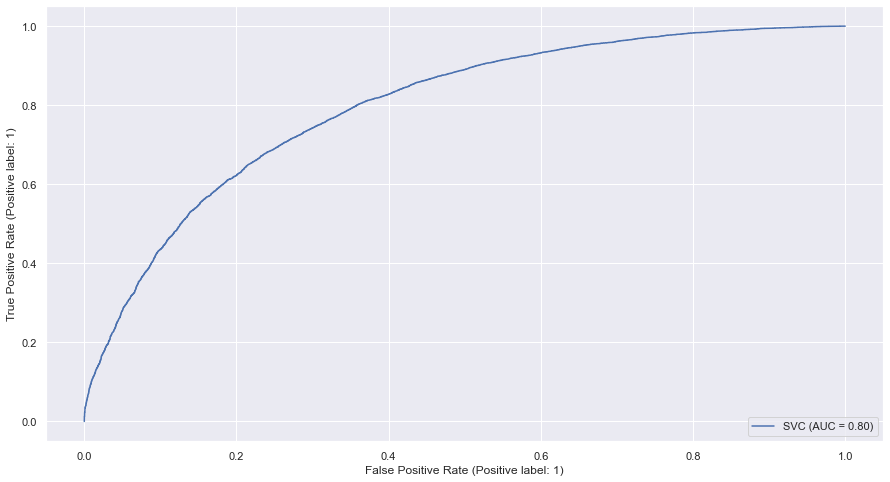

In [291]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svc,X_test,y_test)

In [268]:
X.shape

(66359, 25)

In [292]:
from sklearn.decomposition import PCA
pca=PCA(5)  #0.95
X_pca=pca.fit_transform(X)
X_pca.shape

(66359, 5)

In [ ]:
#new_DF = pd.DataFrame(data = X_train
             #, columns = ['principal component 1', 'principal component 2','principal component 1','principle component 3'])

new_DF = pd.DataFrame(data = X_train
             , columns = ['principal component 1', 'principal component 2'])

In [272]:
#new_DF.head()

In [293]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, random_state = 0)

In [294]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [295]:
svc = SVC()
svc.fit(X_train_pca,y_train_pca)
svc.score(X_test_pca,y_test_pca)

0.6016877637130802

In [277]:
#y_pred = svc.predict(X_test)

In [546]:
#accuracy_score(y_test,y_pred)

In [296]:
#pca=PCA(n_components=2)
#X_pca=pca.fit_transform(X)
#X_pca.shape

In [280]:
#from sklearn.metrics import classification_report, confusion_matrix

In [548]:
#print(classification_report(y_test, y_pred))

In [291]:
from sklearn.datasets import make_classification

from sklearn.metrics import confusion_matrix

In [292]:
predictions = svc.predict(X_test_pca)

In [555]:
confusion_matrix(y_test_pca, predictions)

array([[4905, 2701],
       [3972, 5012]], dtype=int64)

In [557]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_pca, svc.predict(X_test_pca)))

0.5977697408077155


In [ ]:
#GradientBoosting

In [304]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [305]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

#for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

IndentationError: unexpected indent (<ipython-input-305-763aff1c8dd7>, line 4)

In [281]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

NameError: name 'GradientBoostingClassifier' is not defined

In [ ]:
#64 % accuracy

In [295]:
from xgboost import XGBClassifier

In [296]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

[21:22:31] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [297]:
score = xgb_clf.score(X_test, y_test)
print(score)

0.6747287522603979


In [298]:
#67% accuracy